<a href="https://colab.research.google.com/github/mottasilvia/UCU-NLP/blob/main/PLN_Actividad_4_StopWords_Ariel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [62]:
!pip install nltk

In [63]:
import nltk
from nltk.tokenize import word_tokenize
from collections import Counter
import numpy as np

# Descargar recursos necesarios de NLTK
nltk.download('punkt')
nltk.download('stopwords')

import urllib.request


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\aciga\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\aciga\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [64]:
# función para descargar textos txt desde la web
def get_text_from_url(url, start_marker=None, include_start_marker=True, end_marker=None, include_end_marker=True, encoding="utf-8", verbose=False, verbose_lines=200):
    response = urllib.request.urlopen(url)
    raw_text = response.read().decode(encoding)
    if verbose:
        print("Texto crudo")
        print(raw_text[:verbose_lines])
        print("...")
        print(raw_text[len(raw_text)-verbose_lines:])
    text_content = raw_text
    if start_marker is not None or end_marker is not None:
        if start_marker is not None:
            start_index = raw_text.find(start_marker) + len(start_marker) * (include_start_marker == False)
            text_content = raw_text[start_index:].strip()
        if end_marker is not None:
            end_index = text_content.find(end_marker) + len(end_marker) * (include_end_marker == True)
            text_content = text_content[:end_index].strip()
        if verbose:
            print("Texto recortado")
            print(text_content[:verbose_lines])
            print("...")
            print(text_content[len(text_content)-verbose_lines:])
    return text_content

In [65]:
# funciones de cálculo de frecuencias y graficado

from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
import re

# separar el texto en palabras para contar la frecuencia de cada una y devolver tuplas (palabra,frecuencia)
# si se agrega una lista de palabras a incluir solo se devuelven esas palabras si aparecen en el texto
# si se agrega una lista de palabras a excluir las mismas no se devolverán por más que estén en el texto
# si una misma palabra está en la lista de incluir y en la lista de excluir entonces será excluida
def calculate_frequency(texto, palabras_incluir = None, palabras_excluir = None):
  words = re.findall(r'\b\w+\b', texto.lower())
  if palabras_incluir is not None:
    words = [word for word in words if word in palabras_incluir]
  if palabras_excluir is not None:
    words = [word for word in words if word not in palabras_excluir]
  word_freq = Counter(words)
  return word_freq.most_common()



# ver las frecuencias como barras o puntos ('bar' o 'scatter') y marcar visualmente límites mínimo y máximo.
def plot_frequency(data, plot_type='scatter', min_percentile=10, max_percentile=90, ax=None):

    if ax is None:
        ax = plt.gca()  # Obtiene el contexto actual de los ejes si no se proporciona uno

    # Extracción de los valores numéricos
    values = [val for _, val in data]

    # Calculando la suma acumulativa y la suma total
    cumulative_values = np.cumsum(values)
    total_sum = cumulative_values[-1]

    # Calculando los umbrales para los percentiles acumulativos
    lower_threshold = total_sum * (min_percentile / 100)
    upper_threshold = total_sum * (max_percentile / 100)

    # Encontrando los índices para los umbrales
    lower_index = np.where(cumulative_values >= lower_threshold)[0][0]
    upper_index = np.where(cumulative_values >= upper_threshold)[0][0]

    # Creación de la gráfica
    plt.figure(figsize=(10, 6))

    ax.axvline(x=lower_index, color='red', linestyle='--', label=f'{min_percentile}% Lower Accumulative Threshold {lower_index}')
    ax.axvline(x=upper_index, color='green', linestyle='--', label=f'{max_percentile}% Upper Accumulative Threshold {upper_index}')

    if plot_type == 'bar':
        ax.bar(range(len(values)), values, color='blue')
    elif plot_type == 'scatter':
        ax.scatter(range(len(values)), values, color='blue', s=2)

    ax.set_ylabel('Frecuencia')
    ax.set_title('Frecuencia de palabras')
    ax.set_xticklabels([])  # Ocultar las etiquetas del eje x
    ax.legend()
    
    return ax

# grafica de palabras mostrando cantidad y frecuencia acumulada
# se muestran start_n elementos del principio y end_n elementos del final de los datos
def plot_word_distribution_selective(data, start_n=5, end_n=5, ax1=None):

    if ax1 is None:
        ax1 = plt.gca()  # Obtiene el contexto actual de los ejes si no se proporciona uno


    # Extraer palabras y frecuencias
    words, frequencies = zip(*data)

    # Calcular frecuencias acumuladas
    cumulative_frequencies = np.cumsum(frequencies)

    total_frequency = cumulative_frequencies[-1]
    cumulative_percentages = cumulative_frequencies / total_frequency * 100  # Convertir a porcentajes

    # Seleccionar elementos según start_n y end_n
    selected_words = []
    selected_frequencies = []
    selected_cumulative_percentages = []

    if start_n > 0:
        selected_words.extend(words[:start_n])
        selected_frequencies.extend(frequencies[:start_n])
        selected_cumulative_percentages.extend(cumulative_percentages[:start_n])

    if end_n > 0:
        selected_words.extend(words[-end_n:])
        selected_frequencies.extend(frequencies[-end_n:])
        selected_cumulative_percentages.extend(cumulative_percentages[-end_n:])

    # Graficar frecuencias
    color = 'tab:blue'
    ax1.set_xlabel('Palabras')
    ax1.set_ylabel('Frecuencia', color=color)
    ax1.bar(selected_words, selected_frequencies, color=color)
    ax1.tick_params(axis='y', labelcolor=color)
    ax1.set_xticks(range(len(selected_words)))
    ax1.set_xticklabels([str(i) + ': ' + selected_words[i] for i in range(len(selected_words))], rotation=45, ha='right')

    # Crear un segundo eje para las frecuencias acumuladas en porcentaje
    ax2 = ax1.twinx()
    color = 'tab:red'
    ax2.set_ylabel('Frecuencia acumulada (%)', color=color)
    ax2.plot(selected_words, selected_cumulative_percentages, color=color, marker='o', linestyle='dashed', linewidth=2, markersize=5)
    ax2.tick_params(axis='y', labelcolor=color)

    ax2.set_title('Frecuencias de palabras y acumulación en porcentaje')

    return ax1, ax2

def conteo_inicial(text_content,palabras_inicio=50, palabras_fin=0):
    frecuencias = calculate_frequency(text_content)
    print("Frecuencias primeros 20:", frecuencias[:min(20,len(frecuencias))])
    print("Frecuencias últimos 20:", frecuencias[len(frecuencias)-min(20,len(frecuencias)):])
    
    print(f"Cantidad de palabras: {len(frecuencias)}")
    palabras_raras = [x[0] for x in frecuencias if x[1]<=3]
    print(f"Cantidad de palabras frecuencia <=3: {len(palabras_raras)}")
    palabras_unicas = [x[0] for x in frecuencias if x[1]==1]
    print(f"Cantidad de palabras frecuencia =1: {len(palabras_unicas)}")

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

    ax1 = plot_frequency(frecuencias, 'scatter', 25, 75, ax1)
    ax2, ax2_2 = plot_word_distribution_selective(frecuencias, palabras_inicio, palabras_fin, ax2)
    
    plt.tight_layout()
    plt.show()

    return frecuencias


In [66]:
# función que recibe el texto, listas de palabras a incluir y excluir para luego mostrar frecuencias
# por largo de palabra y por palabras con más frecuencia,
# calcula valores de ley de Pareto y grafica para verificar leyes de Zips y Heaps
def analizarTexto(texto, palabras_incluir = None, palabras_excluir = None):
  palabras = re.findall(r'\b\w+\b', texto.lower())

  if palabras_incluir is not None or palabras_excluir is not None:
      print(f"Cantidad de palabras {len(palabras)}")
      palabras_unicas = [w for w in set(palabras)]
      print(f"Cantidad de palabras únicas: {len(palabras_unicas)}")
      if palabras_incluir is not None:
        print(f"A incluir {len(palabras_incluir)} de las cuales {len([w for w in palabras_incluir if w in palabras])} están en el texto")
      if palabras_excluir is not None:
        print(f"A excluir {len(palabras_excluir)} de las cuales {len([w for w in palabras_excluir if w in palabras])} están en el texto")
      print("Luego de de filtrar:")

  if palabras_incluir is not None:
    palabras = [palabra for palabra in palabras if palabra in palabras_incluir]
  if palabras_excluir is not None:
    palabras = [palabra for palabra in palabras if palabra not in palabras_excluir]

  word_freq = Counter(palabras)

  f1 = word_freq.most_common()

  print(f"Cantidad de palabras: {len(palabras)}")
  print(f"Cantidad de palabras únicas: {len(f1)}")
  palabras_raras = [x[0] for x in f1 if x[1]<=3]
  print(f"Cantidad de palabras raras: {len(palabras_raras)}")

  length_count = Counter([len(wf[0]) for wf in f1])
  length_count = sorted(length_count.items())


  # Creación de figura y ejes
  fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(18, 12))

  # Gráfico de distribución de la longitud de las palabras
  lengths, counts = zip(*length_count)
  ax1.bar(lengths, counts, color='blue')
  ax1.set_xlabel('Largo de la palabra')
  ax1.set_ylabel('Cantidad de palabras')
  ax1.set_title('Distribución de la cantidad de palabras por largo')
  ax1.set_xticks(range(1, max(lengths) + 1))
  ax1.grid(axis='y', linestyle='--', alpha=0.7)

  ax2, ax2_2 = plot_word_distribution_selective(f1, 25, 0, ax2)

  # Gráfico de Ley de Zipf
  ranks = np.arange(1, len(f1) + 1)
  values = [wf[1] for wf in f1]
  ax3.loglog(ranks, values, marker='.', linestyle='None', markersize=5)
  ax3.set_title('Ley de Zipf')
  ax3.set_xlabel('Log(Rango)')
  ax3.set_ylabel('Log(Frecuencia)')
  ax3.grid(True)

  # Gráfico de Ley de Heaps
  vocab_size = []
  total_tokens = []
  for i in range(1000, len(palabras), 1000):
      vocab_size.append(len(set(palabras[:i])))
      total_tokens.append(i)
  ax4.plot(total_tokens, vocab_size, marker=".")
  ax4.set_title("Ley de Heaps")
  ax4.set_xlabel("Número total de palabras")
  ax4.set_ylabel("Número de palabras distintas")

  plt.tight_layout()
  plt.show()

  print("Ley de Pareto")
  total_words = len(f1)
  cumulative_freq = []
  cf = 0
  for wf in sorted(f1, key=lambda x: x[1]):
    cf = cf+wf[1]
    cumulative_freq.append((wf[0],cf))

  # Porcentaje de palabras distintas que son el 80% del total
  pareto_limit_80 = int(cf * 0.8)
  pareto_words_80 = [wcf[0] for wcf in cumulative_freq if wcf[1] > pareto_limit_80]
  pareto_percentage_80 = (len(pareto_words_80) / total_words) * 100
  print(f"Porcentaje de palabras distintas que son el 80% del total: {pareto_percentage_80:.2f}%")

  # Porcentaje de palabras distintas que son el 80% del total
  pareto_limit_20 = int(cf * 0.2)
  pareto_words_20 = [wcf[0] for wcf in cumulative_freq if wcf[1] < pareto_limit_20]
  pareto_percentage_20 = (len(pareto_words_20) / total_words) * 100
  print(f"Porcentaje de palabras distintas que son el 20% del total: {pareto_percentage_20:.2f}%")




Texto: Ariel de José Enrique Rodó

In [67]:
# navegando la url se ve que al inicio se incluye texto del sitio gutenberg, prólogo, etc, se busca "Aquella tarde, el viejo y venerado maestro"
# también se ve que luego del libro se incluye información del proyecto Gutemberg y su licencia
# se busca *** END OF THE PROJECT GUTENBERG EBOOK ARIEL *** para terminar
text_content = get_text_from_url(
        url="https://www.gutenberg.org/cache/epub/22899/pg22899.txt",
        start_marker="Aquella tarde, el viejo y venerado maestro",
        include_start_marker=True,
        end_marker="*** END OF THE PROJECT GUTENBERG EBOOK ARIEL ***",
        include_end_marker=False,   
        encoding='utf-8-sig',
        verbose=True
)

Texto crudo
The Project Gutenberg eBook of Ariel
    
This ebook is for the use of anyone anywhere in the United States and
most other parts of the world at no cost and with almost no restrictions
whatsoever.
...
including how to make donations to the Project Gutenberg Literary
Archive Foundation, how to help produce our new eBooks, and how to
subscribe to our email newsletter to hear about new eBooks.



Texto recortado
Aquella tarde, el viejo y venerado maestro, a quien solían llamar
Próspero, por alusión al sabio mago de _La Tempestad_ shakespiriana, se
despedía de sus jóvenes discípulos, pasado un año de tareas,
...
 al
cielo, el cielo la mira. Sobre su masa indiferente y obscura, como
tierra del surco, algo desciende de lo alto. La vibración de las
estrellas se parece al movimiento de unas manos de sembrador.


Frecuencias primeros 20: [('de', 2105), ('la', 1699), ('que', 800), ('el', 778), ('en', 738), ('y', 699), ('a', 481), ('del', 474), ('las', 408), ('los', 398), ('su', 312), ('una', 309), ('un', 256), ('por', 227), ('se', 195), ('con', 193), ('no', 178), ('es', 173), ('más', 169), ('para', 158)]
Frecuencias últimos 20: [('sirio', 1), ('nielado', 1), ('cáliz', 1), ('volcado', 1), ('crucero', 1), ('cuyos', 1), ('tienden', 1), ('prolongado', 1), ('enjolrás', 1), ('reflexivo', 1), ('señalando', 1), ('sucesivamente', 1), ('perezosa', 1), ('ondulación', 1), ('rebaño', 1), ('radiante', 1), ('observo', 1), ('estrellas', 1), ('unas', 1), ('sembrador', 1)]
Cantidad de palabras: 5515
Cantidad de palabras frecuencia <=3: 4709
Cantidad de palabras frecuencia =1: 3536


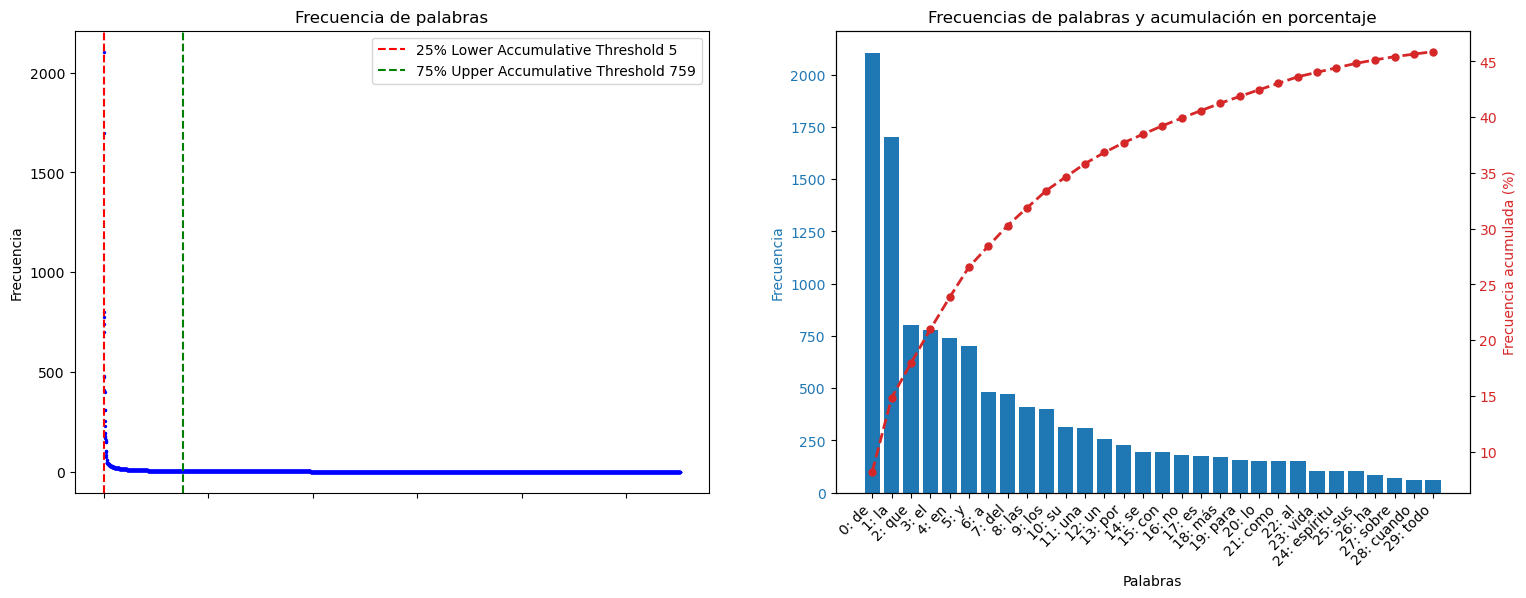

<Figure size 1000x600 with 0 Axes>

In [68]:
f1 = conteo_inicial(text_content, 30)

In [69]:
# el corte para determinar stop words podría estar en la palabra 22

In [70]:
stop_words_empiricas = [w[0] for w in f1[:23]]
print(stop_words_empiricas)

['de', 'la', 'que', 'el', 'en', 'y', 'a', 'del', 'las', 'los', 'su', 'una', 'un', 'por', 'se', 'con', 'no', 'es', 'más', 'para', 'lo', 'como', 'al']


In [71]:
# stop words en español de nltk
print(set(nltk.corpus.stopwords.words('spanish')))

{'mía', 'unos', 'estuviese', 'lo', 'esas', 'hayamos', 'tuvo', 'por', 'estuviera', 'tuya', 'el', 'nos', 'fuéramos', 'estuvieseis', 'teníais', 'estada', 'habido', 'estuvieran', 'estaban', 'mis', 'nosotras', 'somos', 'se', 'vuestra', 'seremos', 'estuvieron', 'estarías', 'yo', 'un', 'porque', 'hubiera', 'seamos', 'a', 'no', 'habíamos', 'habríais', 'sus', 'habían', 'habidas', 'estaríamos', 'ni', 'le', 'tuviste', 'quienes', 'ti', 'está', 'estuvierais', 'estamos', 'erais', 'sentidos', 'algo', 'ellas', 'estuviéramos', 'fuiste', 'nuestro', 'tendrá', 'seríamos', 'sí', 'tengo', 'fueses', 'estar', 'pero', 'este', 'fueseis', 'estén', 'mi', 'míos', 'habréis', 'estado', 'fui', 'hayas', 'seas', 'tendré', 'hemos', 'serían', 'soy', 'os', 'fuesen', 'hubieses', 'seríais', 'estuviste', 'suyos', 'nosotros', 'tanto', 'hayáis', 'todo', 'estaré', 'estemos', 'del', 'sea', 'seáis', 'hube', 'éramos', 'en', 'tuvieron', 'ya', 'eras', 'tenidas', 'su', 'esos', 'habremos', 'sois', 'estuvisteis', 'tuvisteis', 'sobre', 

In [72]:
# stops word empiricas que no están en nltk.corpus.stopwords.words('spanish')
print([w for w in stop_words_empiricas if w not in set(nltk.corpus.stopwords.words('spanish'))])

[]


In [73]:
# todas ls stop words empíricas están en las de nltk

In [74]:
# stops word de nltk.corpus.stopwords.words('spanish') que están el texto pero no en stop words empíricas
words = [wf[0] for wf in f1]
print([w for w in set(nltk.corpus.stopwords.words('spanish')) if w in words and w not in stop_words_empiricas])

['mía', 'unos', 'esas', 'tuvo', 'nos', 'habido', 'mis', 'somos', 'vuestra', 'yo', 'porque', 'hubiera', 'sus', 'habían', 'ni', 'le', 'quienes', 'está', 'sentidos', 'algo', 'ellas', 'nuestro', 'tendrá', 'sí', 'estar', 'pero', 'este', 'estén', 'mi', 'habréis', 'estado', 'hemos', 'serían', 'os', 'suyos', 'nosotros', 'tanto', 'todo', 'sea', 'tuvieron', 'ya', 'esos', 'sois', 'sobre', 'qué', 'siente', 'contra', 'habéis', 'estaba', 'mucho', 'ese', 'donde', 'habrá', 'son', 'tengan', 'fuera', 'tenía', 'todos', 'estas', 'fueron', 'hayan', 'suya', 'hay', 'tendría', 'les', 'vuestras', 'tenido', 'desde', 'antes', 'otro', 'tendrán', 'sería', 'haya', 'esta', 'estos', 'quien', 'e', 'estará', 'nuestra', 'habrían', 'cuando', 'tengáis', 'sentido', 'tendréis', 'me', 'uno', 'era', 'algunas', 'ellos', 'eran', 'durante', 'ante', 'o', 'esa', 'sin', 'otras', 'teniendo', 'estados', 'vuestro', 'están', 'nuestros', 'tenemos', 'sentida', 'mí', 'poco', 'muchos', 'tenga', 'algunos', 'habría', 'han', 'ella', 'nada', '

In [75]:
# conteo de palabras quitando stop words empiricas
f3 = calculate_frequency(text_content, palabras_excluir = stop_words_empiricas)
print(f3)

[('vida', 104), ('espíritu', 103), ('sus', 101), ('ha', 83), ('sobre', 72), ('cuando', 59), ('todo', 58), ('ella', 50), ('pero', 47), ('han', 46), ('alma', 45), ('toda', 43), ('él', 43), ('esa', 43), ('obra', 42), ('civilización', 42), ('mismo', 41), ('o', 41), ('ser', 41), ('le', 39), ('nuestra', 39), ('sin', 39), ('moral', 39), ('ideal', 38), ('sentimiento', 37), ('cultura', 37), ('son', 37), ('pensamiento', 36), ('ni', 35), ('ese', 34), ('democracia', 34), ('sentido', 33), ('naturaleza', 33), ('parte', 32), ('sólo', 32), ('fuerza', 32), ('sino', 32), ('humanas', 31), ('realidad', 31), ('entre', 31), ('todas', 30), ('noble', 30), ('humana', 30), ('donde', 30), ('bien', 29), ('si', 29), ('vez', 28), ('carácter', 28), ('e', 28), ('todos', 28), ('debe', 28), ('ellos', 27), ('puede', 27), ('historia', 27), ('desde', 27), ('dentro', 27), ('ya', 26), ('genio', 26), ('tiempo', 26), ('cada', 26), ('voluntad', 26), ('actividad', 26), ('porvenir', 26), ('vuestra', 25), ('hay', 25), ('sociedad'

In [76]:
# conteo de palabras quitando stop words de nltk
f3 = calculate_frequency(text_content, palabras_excluir = set(nltk.corpus.stopwords.words('spanish')))
print(f3)

[('vida', 104), ('espíritu', 103), ('alma', 45), ('toda', 43), ('obra', 42), ('civilización', 42), ('mismo', 41), ('ser', 41), ('moral', 39), ('ideal', 38), ('sentimiento', 37), ('cultura', 37), ('pensamiento', 36), ('democracia', 34), ('naturaleza', 33), ('parte', 32), ('sólo', 32), ('fuerza', 32), ('sino', 32), ('humanas', 31), ('realidad', 31), ('todas', 30), ('noble', 30), ('humana', 30), ('bien', 29), ('si', 29), ('vez', 28), ('carácter', 28), ('debe', 28), ('puede', 27), ('historia', 27), ('dentro', 27), ('genio', 26), ('tiempo', 26), ('cada', 26), ('voluntad', 26), ('actividad', 26), ('porvenir', 26), ('sociedad', 25), ('libertad', 24), ('juventud', 23), ('así', 23), ('sociedades', 23), ('pueblo', 23), ('belleza', 22), ('humanidad', 22), ('aquel', 22), ('aun', 22), ('humano', 22), ('acción', 21), ('arte', 21), ('luz', 21), ('siempre', 21), ('igualdad', 21), ('ambiente', 20), ('amor', 20), ('aún', 20), ('américa', 20), ('social', 20), ('material', 20), ('idea', 19), ('ideas', 19)

In [77]:
# conteo de frecuencias de palabras específicas
f2 = calculate_frequency(text_content, palabras_incluir = ['de', 'la', 'que', 'el', 'en', 'y', 'a', 'los', 'se', 'del'])
print(f2)

[('de', 2105), ('la', 1699), ('que', 800), ('el', 778), ('en', 738), ('y', 699), ('a', 481), ('del', 474), ('los', 398), ('se', 195)]


Cantidad de palabras: 25681
Cantidad de palabras únicas: 5515
Cantidad de palabras raras: 4709


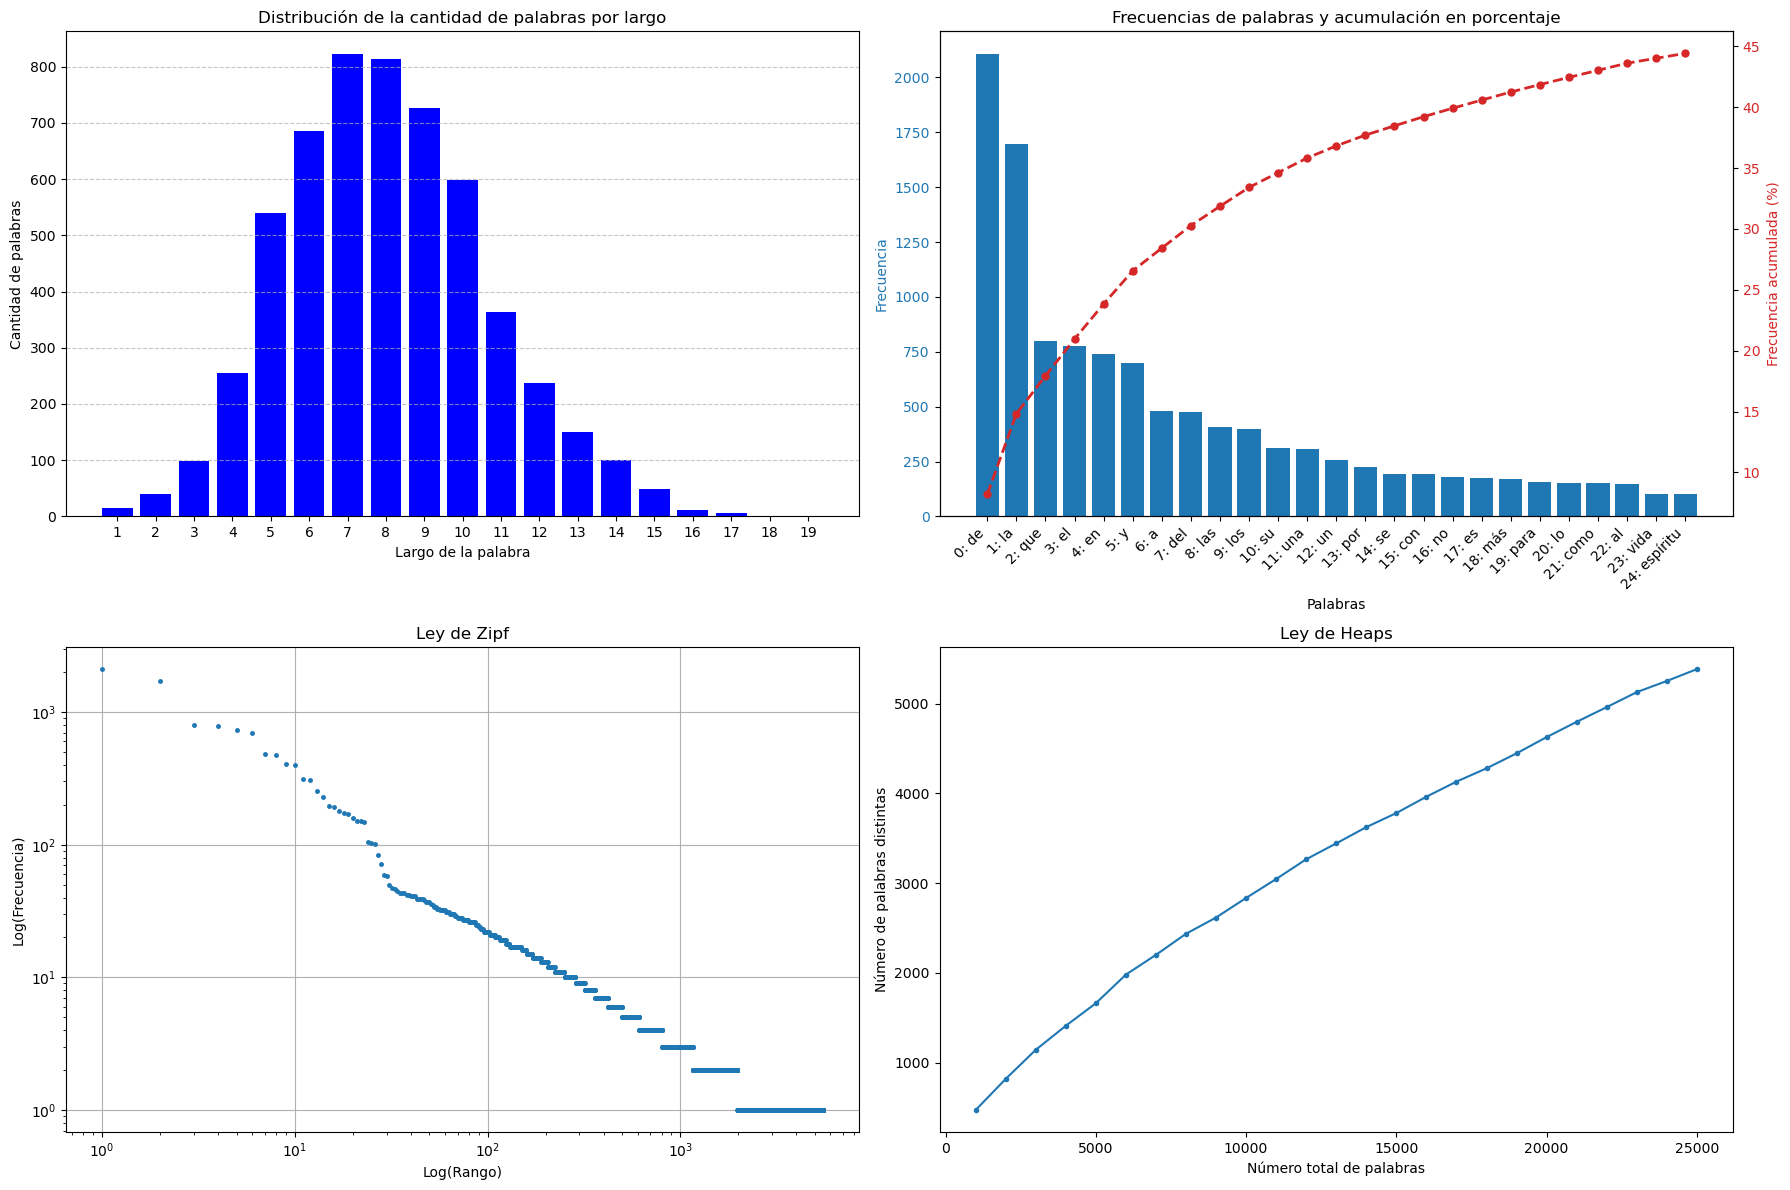

Ley de Pareto
Porcentaje de palabras distintas que son el 80% del total: 0.07%
Porcentaje de palabras distintas que son el 20% del total: 78.60%


In [78]:
# análisis del texto sin quitar
analizarTexto(text_content)

In [79]:
# No se cumple la ley de Pareto, muy pocas palabras acumulan el 80% del texto

# Observando la gráfica para ley de Zips:
# No se ve linealidad

# Observando la gráfica para la ley de Heaps:
# La curva se vuelve casi lineal

Cantidad de palabras 25681
Cantidad de palabras únicas: 5515
A excluir 313 de las cuales 161 están en el texto
Luego de de filtrar:
Cantidad de palabras: 12576
Cantidad de palabras únicas: 5354
Cantidad de palabras raras: 4661


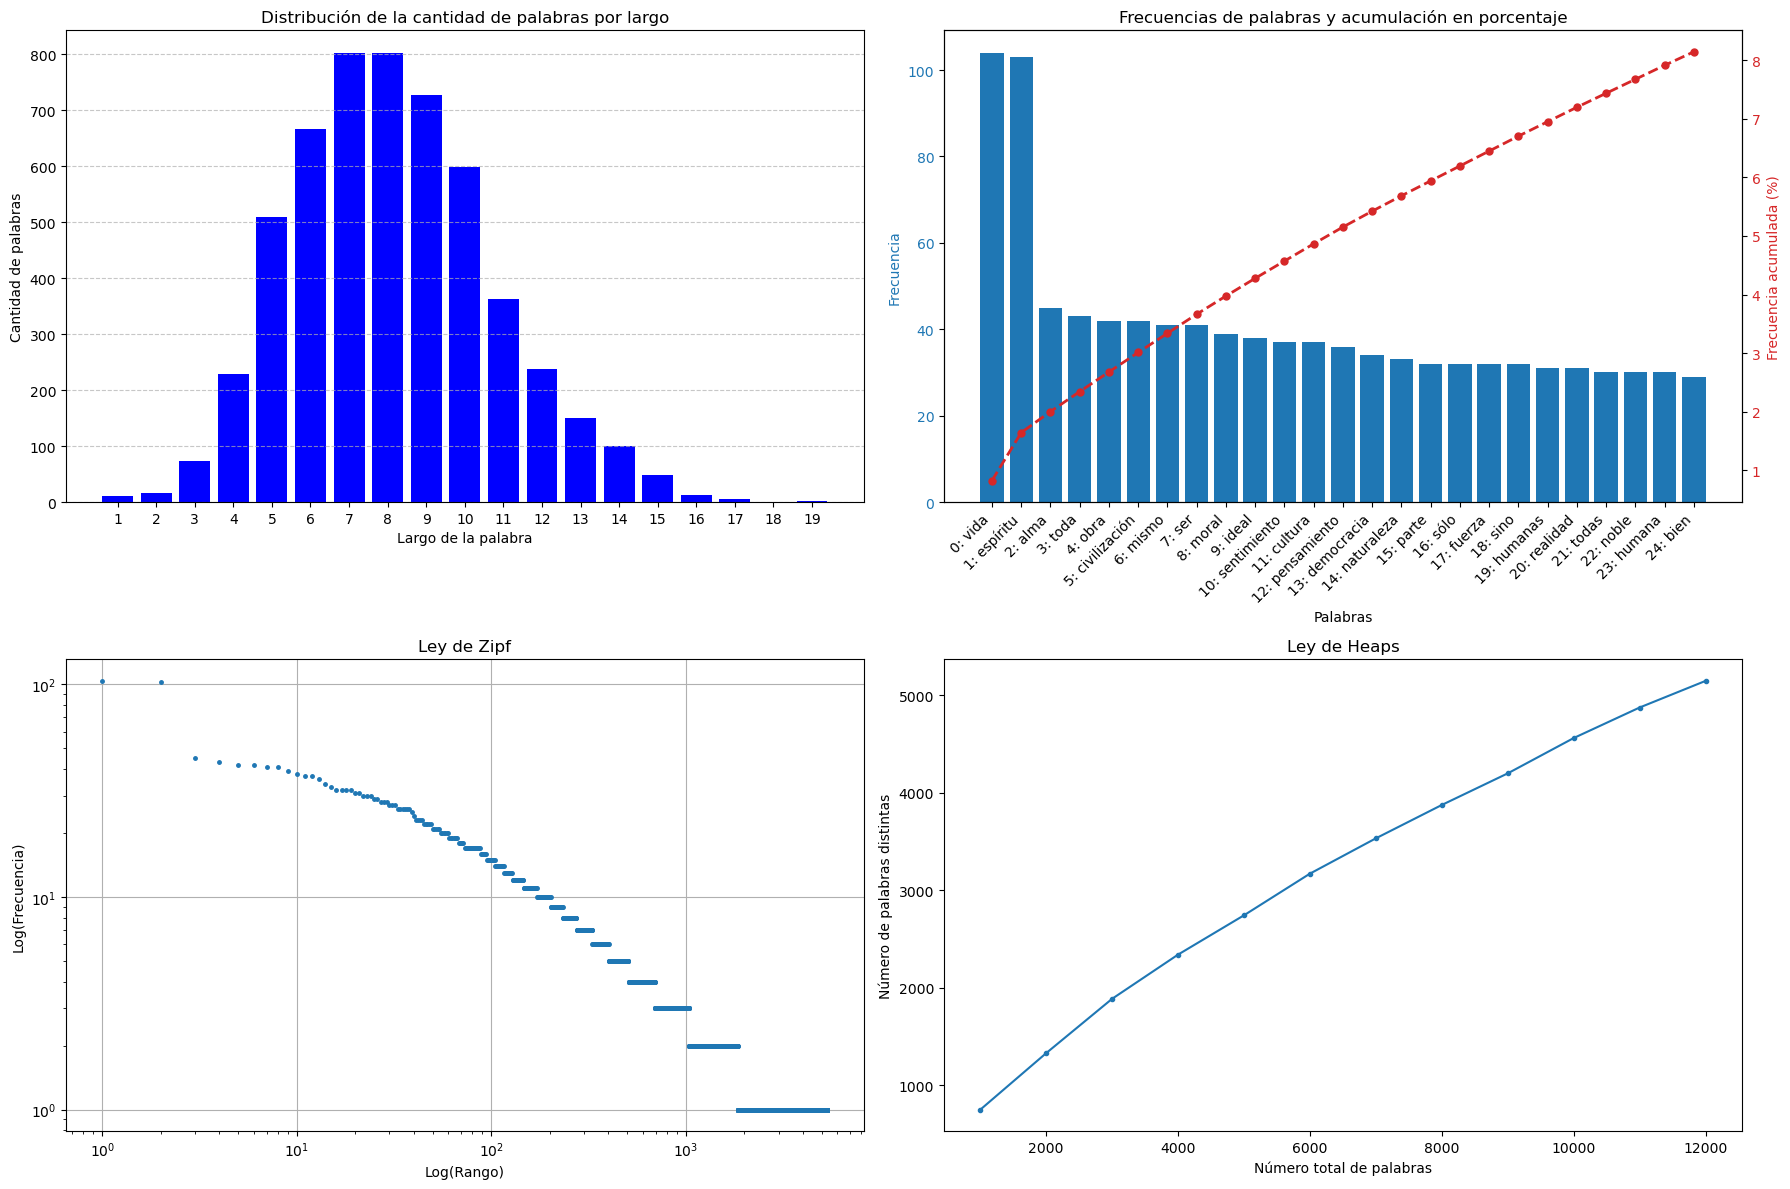

Ley de Pareto
Porcentaje de palabras distintas que son el 80% del total: 1.85%
Porcentaje de palabras distintas que son el 20% del total: 46.96%


In [80]:
# análisis del texto sin stop words de nltk en español
analizarTexto(text_content, palabras_excluir = set(nltk.corpus.stopwords.words('spanish')))

In [81]:
# No se cumple la ley de Pareto, muy pocas palabras acumulan el 80% del texto

# Observando la gráfica para ley de Zips:
# se ve un salto en la izquierda por las primeras dos palabras
# Del lado derecho derecho la gráfica se ve dispersa porque hay pocas palabras con frecuencia muy alta pero se ve linealidad.
# Del lado izquierdo se generan bandas porque hay palabras con baja frecuencia

# Observando la gráfica para la ley de Heaps:
# La curva se vuelve casi lineal

Cantidad de palabras 25681
Cantidad de palabras únicas: 5515
A excluir 315 de las cuales 162 están en el texto
Luego de de filtrar:
Cantidad de palabras: 12472
Cantidad de palabras únicas: 5353
Cantidad de palabras raras: 4661


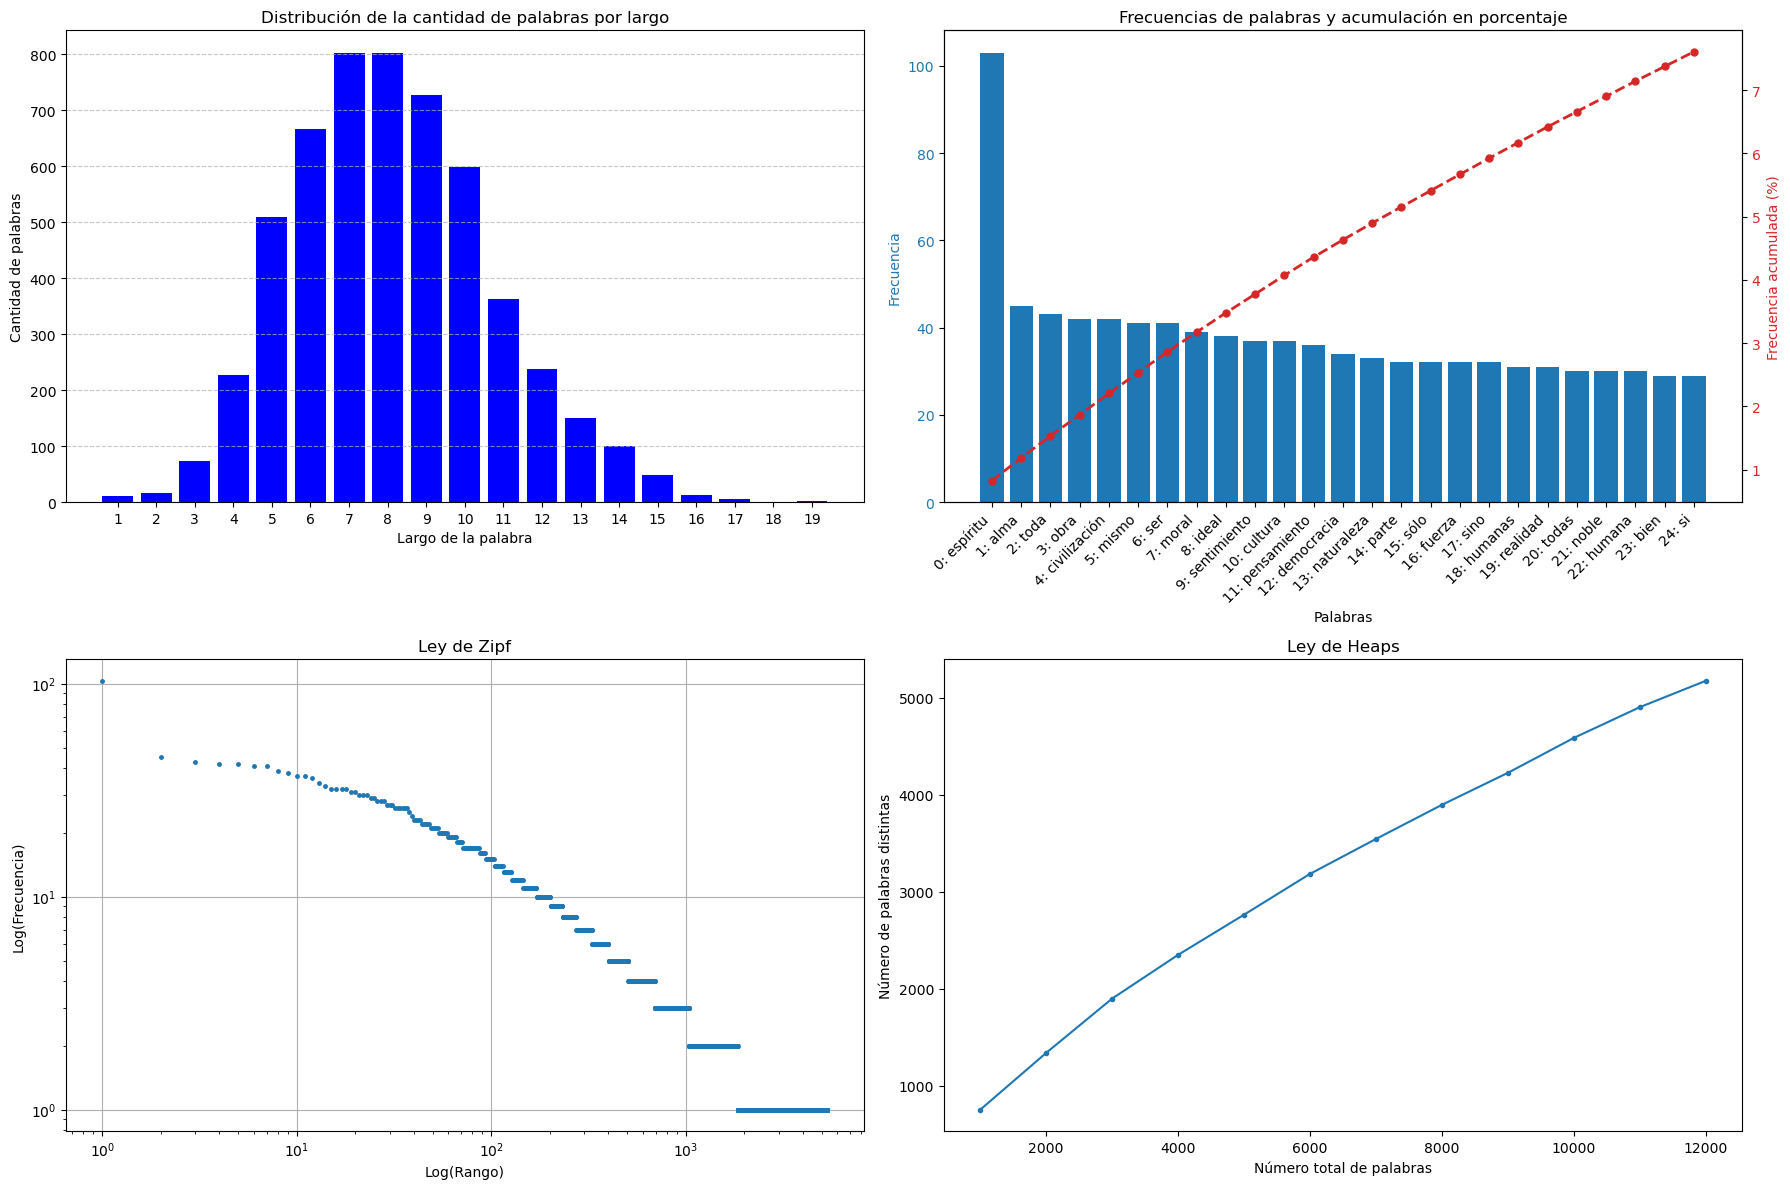

Ley de Pareto
Porcentaje de palabras distintas que son el 80% del total: 1.94%
Porcentaje de palabras distintas que son el 20% del total: 46.57%


In [82]:
# análisis del texto sin stop words de nltk en español + ['vida','espiritu']
analizarTexto(text_content, palabras_excluir = (set(nltk.corpus.stopwords.words('spanish') + ['vida','espiritu'])))

In [83]:
# No se cumple la ley de Pareto, muy pocas palabras acumulan el 80% del texto

# Observando la gráfica para ley de Zips:
# Se ve bastante linealidad
# Del lado derecho derecho la gráfica se ve un poco dispersa porque hay pocas palabras con frecuencia muy alta pero se ve linealidad.
# Del lado izquierdo se generan bandas porque hay palabras con baja frecuencia

# Observando la gráfica para la ley de Heaps:
# La curva se vuelve casi lineal

Texto: Cuentos de amor de locura y de muerte de Horacio Quiroga

In [84]:
# navegando la url se ve que al inicio se incluye texto del sitio gutenberg, prólogo, etc, se busca "#UNA ESTACION DE AMOR#"
# también se ve que luego del libro se incluye información del proyecto Gutemberg y su licencia
# se busca *** END OF THE PROJECT GUTENBERG EBOOK CUENTOS DE AMOR DE LOCURA Y DE MUERTE *** para terminar
text_content = get_text_from_url(
        url="https://www.gutenberg.org/cache/epub/13507/pg13507.txt",
        start_marker="#UNA ESTACION DE AMOR#",
        include_start_marker=True,
        end_marker="*** END OF THE PROJECT GUTENBERG EBOOK CUENTOS DE AMOR DE LOCURA Y DE MUERTE ***",
        include_end_marker=False,
        encoding='utf-8-sig',
        verbose=True
)

Texto crudo
The Project Gutenberg eBook of Cuentos de Amor de Locura y de Muerte
    
This ebook is for the use of anyone anywhere in the United States and
most other parts of the world at no cost and with alm
...
including how to make donations to the Project Gutenberg Literary
Archive Foundation, how to help produce our new eBooks, and how to
subscribe to our email newsletter to hear about new eBooks.



Texto recortado
#UNA ESTACION DE AMOR#




#Primavera#


Era el martes de carnaval. Nébel acababa de entrar en el corso, ya al
oscurecer, y mientras deshacía un paquete de serpentinas, miró al
carruaje de d
...
 más de cinco
centímetros.

--¿Es verdad?--murmura--o arrulla, mejor dicho.

--¿Se puede poner arrulla?--le pregunto.

--¡Sí, y esto, y esto! Y me da un beso.

¿Qué más puedo añadir?


FIN


Frecuencias primeros 20: [('de', 2273), ('la', 1601), ('y', 1448), ('el', 1417), ('a', 1242), ('que', 1239), ('en', 1129), ('no', 822), ('su', 667), ('se', 665), ('un', 663), ('los', 605), ('con', 596), ('al', 423), ('por', 413), ('una', 393), ('lo', 375), ('las', 353), ('me', 351), ('más', 329)]
Frecuencias últimos 20: [('escrito', 1), ('endiabladamente', 1), ('gracioso', 1), ('lapicera', 1), ('escribo', 1), ('protestado', 1), ('arte', 1), ('literario', 1), ('engolfado', 1), ('resigna', 1), ('esposa', 1), ('general', 1), ('reconstruída', 1), ('etapas', 1), ('acertado', 1), ('interrumpe', 1), ('escrita', 1), ('argumento', 1), ('irrefutable', 1), ('añadir', 1)]
Cantidad de palabras: 8249
Cantidad de palabras frecuencia <=3: 6662
Cantidad de palabras frecuencia =1: 4775


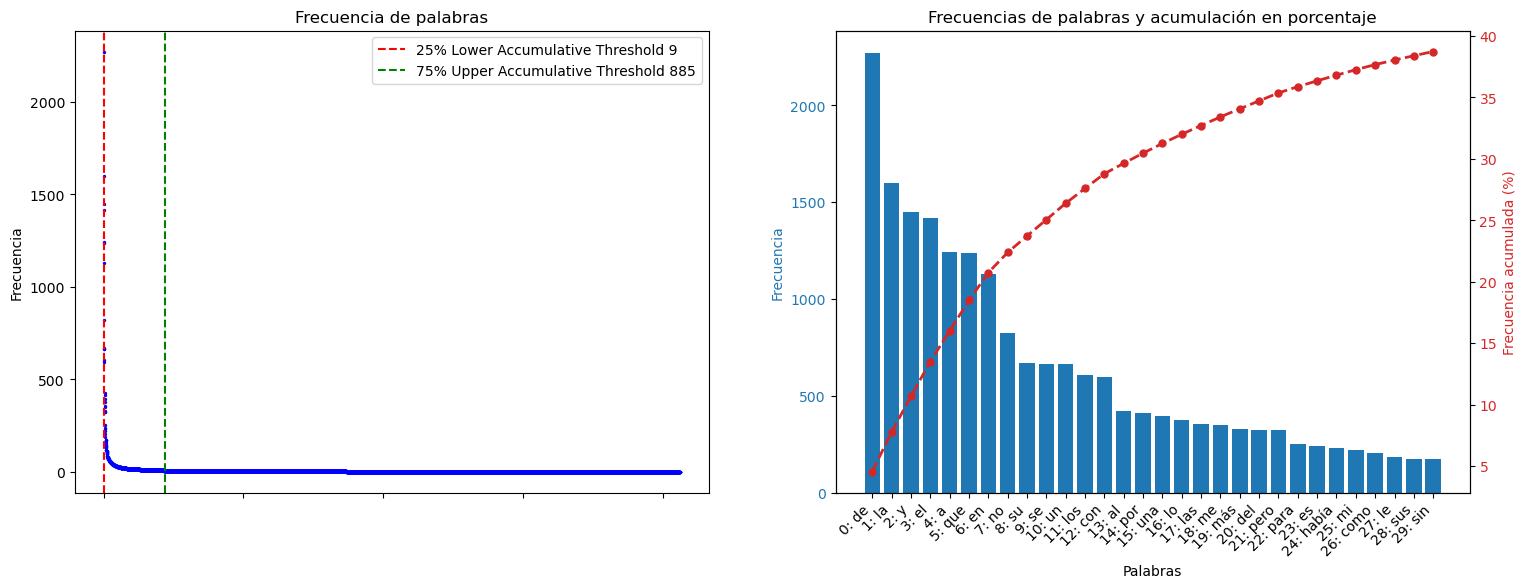

<Figure size 1000x600 with 0 Axes>

In [85]:
f1 = conteo_inicial(text_content,30)

In [86]:
# el corte para determinar stop words podría estar en la palabra 23

In [87]:
stop_words_empiricas = [w[0] for w in f1[:24]]
print(stop_words_empiricas)

['de', 'la', 'y', 'el', 'a', 'que', 'en', 'no', 'su', 'se', 'un', 'los', 'con', 'al', 'por', 'una', 'lo', 'las', 'me', 'más', 'del', 'pero', 'para', 'es']


In [88]:
# stop words en español de nltk
print(set(nltk.corpus.stopwords.words('spanish')))

{'mía', 'unos', 'estuviese', 'lo', 'esas', 'hayamos', 'tuvo', 'por', 'estuviera', 'tuya', 'el', 'nos', 'fuéramos', 'estuvieseis', 'teníais', 'estada', 'habido', 'estuvieran', 'estaban', 'mis', 'nosotras', 'somos', 'se', 'vuestra', 'seremos', 'estuvieron', 'estarías', 'yo', 'un', 'porque', 'hubiera', 'seamos', 'a', 'no', 'habíamos', 'habríais', 'sus', 'habían', 'habidas', 'estaríamos', 'ni', 'le', 'tuviste', 'quienes', 'ti', 'está', 'estuvierais', 'estamos', 'erais', 'sentidos', 'algo', 'ellas', 'estuviéramos', 'fuiste', 'nuestro', 'tendrá', 'seríamos', 'sí', 'tengo', 'fueses', 'estar', 'pero', 'este', 'fueseis', 'estén', 'mi', 'míos', 'habréis', 'estado', 'fui', 'hayas', 'seas', 'tendré', 'hemos', 'serían', 'soy', 'os', 'fuesen', 'hubieses', 'seríais', 'estuviste', 'suyos', 'nosotros', 'tanto', 'hayáis', 'todo', 'estaré', 'estemos', 'del', 'sea', 'seáis', 'hube', 'éramos', 'en', 'tuvieron', 'ya', 'eras', 'tenidas', 'su', 'esos', 'habremos', 'sois', 'estuvisteis', 'tuvisteis', 'sobre', 

In [89]:
# stops word empiricas que no están en nltk.corpus.stopwords.words('spanish')
print([w for w in stop_words_empiricas if w not in set(nltk.corpus.stopwords.words('spanish'))])

[]


In [90]:
# todas ls stop words empíricas están en las de nltk

In [91]:
# stops word de nltk.corpus.stopwords.words('spanish') que están el texto pero no en stop words empíricas
words = [wf[0] for wf in f1]
print([w for w in set(nltk.corpus.stopwords.words('spanish')) if w in words and w not in stop_words_empiricas])

['mía', 'unos', 'estuviese', 'esas', 'tuvo', 'estuviera', 'nos', 'habido', 'estuvieran', 'estaban', 'mis', 'nosotras', 'somos', 'estuvieron', 'yo', 'porque', 'hubiera', 'seamos', 'habíamos', 'sus', 'habían', 'ni', 'le', 'quienes', 'ti', 'está', 'estamos', 'algo', 'ellas', 'nuestro', 'sí', 'tengo', 'estar', 'este', 'estén', 'mi', 'míos', 'estado', 'hayas', 'seas', 'hemos', 'serían', 'soy', 'suyos', 'nosotros', 'tanto', 'todo', 'sea', 'éramos', 'ya', 'esos', 'sobre', 'qué', 'siente', 'contra', 'tuyo', 'estaba', 'mucho', 'ese', 'estás', 'estoy', 'donde', 'habrá', 'son', 'fuera', 'tenía', 'todos', 'estas', 'mío', 'estaría', 'fueron', 'suya', 'hay', 'tendría', 'les', 'tenido', 'desde', 'antes', 'suyas', 'otro', 'sería', 'haya', 'tienes', 'esta', 'estos', 'quien', 'e', 'estará', 'nuestra', 'tuviera', 'cuando', 'tu', 'tuyos', 'sentido', 'tendríamos', 'uno', 'era', 'algunas', 'ellos', 'estuvo', 'eran', 'como', 'durante', 'ante', 'o', 'esa', 'estabas', 'teníamos', 'sin', 'otras', 'teniendo', 'f

In [92]:
# conteo de palabras quitando stop words empiricas
f3 = calculate_frequency(text_content, palabras_excluir = stop_words_empiricas)
print(f3)

[('había', 230), ('mi', 222), ('como', 206), ('le', 186), ('sus', 174), ('sin', 172), ('qué', 169), ('ya', 163), ('ojos', 150), ('sobre', 143), ('era', 139), ('yo', 138), ('vez', 136), ('todo', 136), ('si', 127), ('cuando', 120), ('dos', 120), ('ella', 120), ('sí', 114), ('aún', 113), ('bien', 111), ('nébel', 109), ('él', 106), ('día', 104), ('noche', 103), ('hasta', 102), ('fin', 98), ('después', 97), ('maría', 97), ('mí', 87), ('muy', 83), ('o', 82), ('nada', 82), ('entonces', 80), ('te', 80), ('momento', 77), ('poco', 75), ('hombre', 75), ('cabeza', 74), ('fué', 74), ('esa', 74), ('casa', 73), ('esto', 72), ('esta', 68), ('madre', 67), ('usted', 67), ('ha', 66), ('mujer', 66), ('tenía', 65), ('desde', 65), ('ahora', 65), ('siempre', 65), ('eso', 65), ('ese', 63), ('tres', 63), ('nuevo', 63), ('amor', 62), ('así', 62), ('ni', 62), ('mismo', 61), ('dijo', 60), ('días', 59), ('está', 59), ('otro', 58), ('mamá', 58), ('tarde', 56), ('otra', 55), ('estaba', 55), ('años', 54), ('tras', 54

In [93]:
# conteo de palabras quitando stop words de nltk
f3 = calculate_frequency(text_content, palabras_excluir = set(nltk.corpus.stopwords.words('spanish')))
print(f3)

[('ojos', 150), ('vez', 136), ('si', 127), ('dos', 120), ('aún', 113), ('bien', 111), ('nébel', 109), ('día', 104), ('noche', 103), ('fin', 98), ('después', 97), ('maría', 97), ('entonces', 80), ('momento', 77), ('hombre', 75), ('cabeza', 74), ('fué', 74), ('casa', 73), ('madre', 67), ('usted', 67), ('mujer', 66), ('ahora', 65), ('siempre', 65), ('tres', 63), ('nuevo', 63), ('amor', 62), ('así', 62), ('mismo', 61), ('dijo', 60), ('días', 59), ('mamá', 58), ('tarde', 56), ('años', 54), ('tras', 54), ('aquí', 54), ('lidia', 53), ('monte', 51), ('perros', 51), ('bajo', 50), ('allí', 50), ('lado', 50), ('rato', 50), ('voz', 49), ('mañana', 49), ('toda', 48), ('tiempo', 48), ('mientras', 47), ('hora', 46), ('casi', 46), ('vida', 46), ('mano', 44), ('cuatro', 44), ('luego', 44), ('pues', 44), ('miró', 42), ('ah', 42), ('horas', 41), ('mirada', 41), ('cuanto', 40), ('ser', 40), ('agua', 39), ('seguida', 39), ('diez', 39), ('perro', 39), ('elvira', 39), ('hacia', 38), ('aunque', 38), ('pronto'

In [94]:
# conteo de frecuencias de palabras específicas
f2 = calculate_frequency(text_content, palabras_incluir = ['de', 'la', 'que', 'el', 'en', 'y', 'a', 'los', 'se', 'del'])
print(f2)

[('de', 2273), ('la', 1601), ('y', 1448), ('el', 1417), ('a', 1242), ('que', 1239), ('en', 1129), ('se', 665), ('los', 605), ('del', 323)]


Cantidad de palabras: 49903
Cantidad de palabras únicas: 8249
Cantidad de palabras raras: 6662


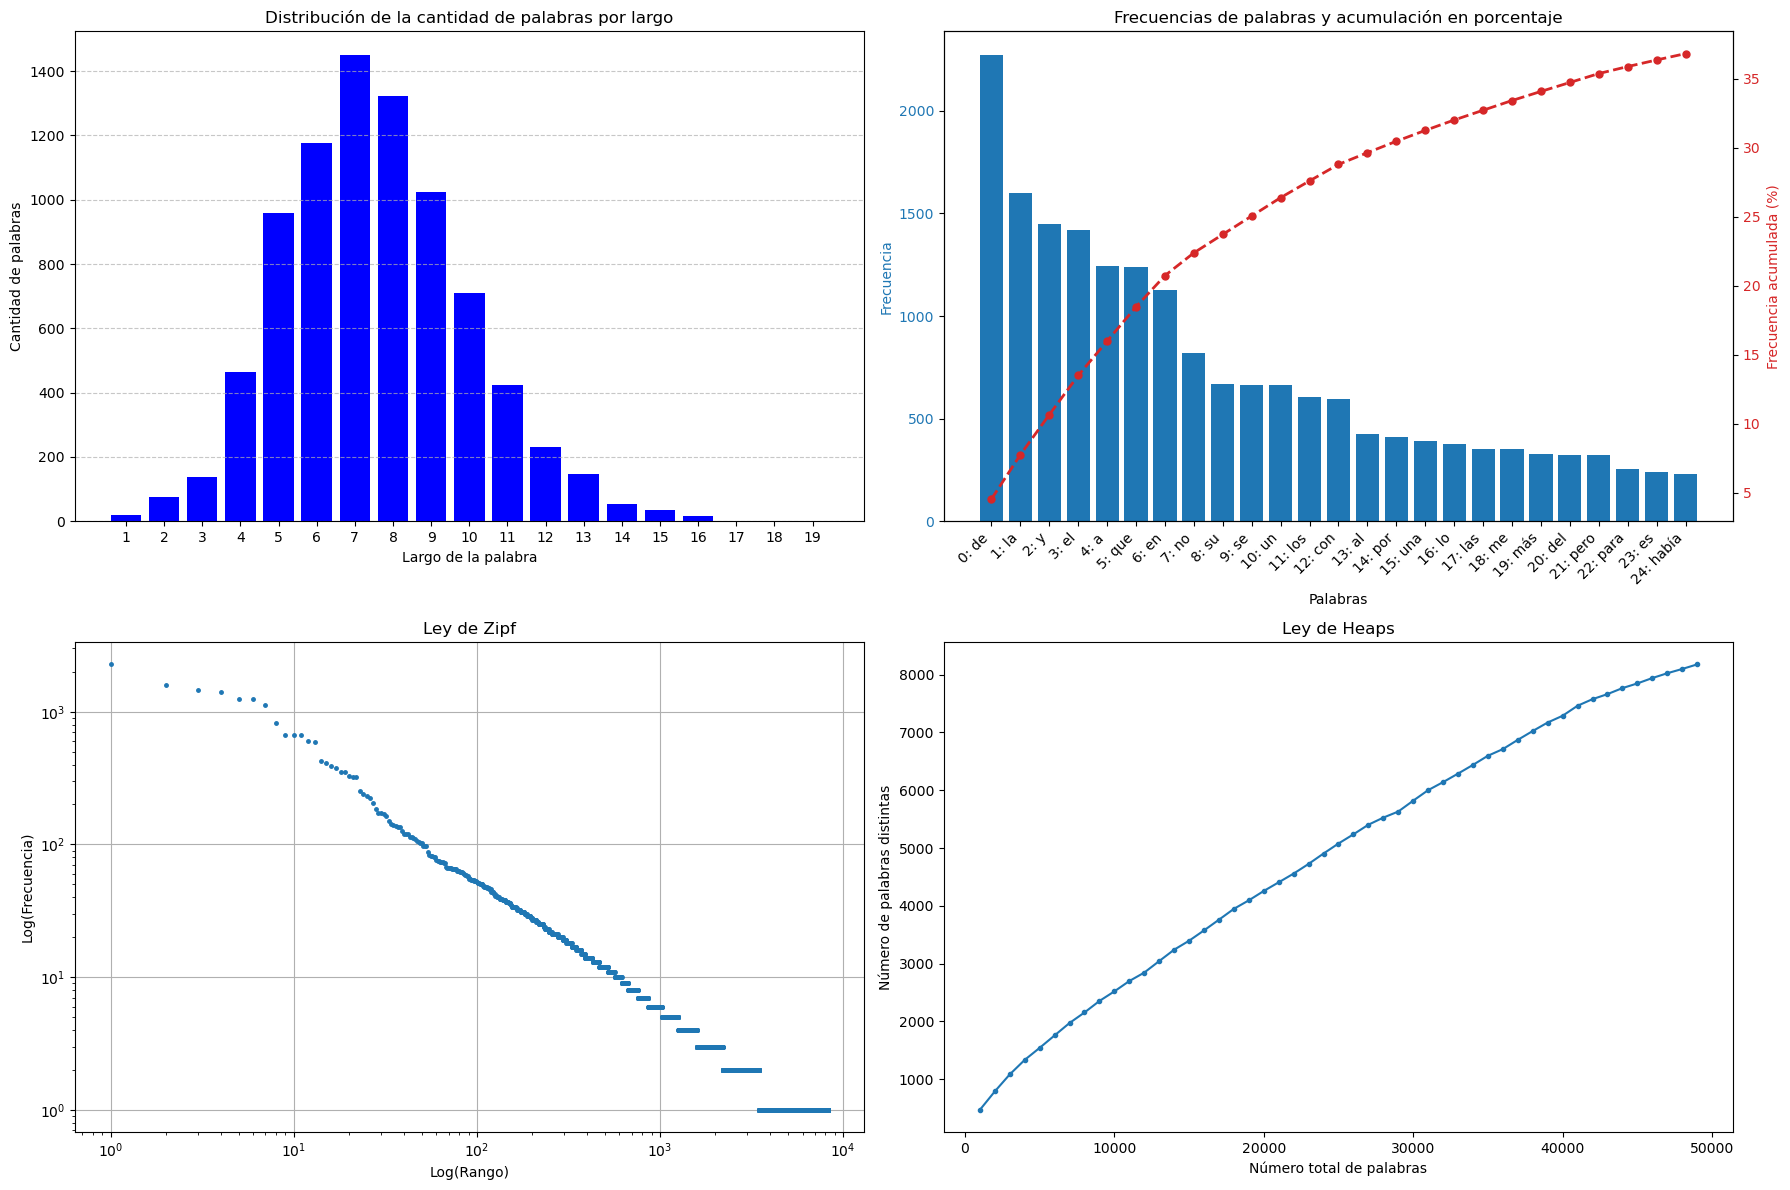

Ley de Pareto
Porcentaje de palabras distintas que son el 80% del total: 0.08%
Porcentaje de palabras distintas que son el 20% del total: 83.25%


In [95]:
# análisis del texto completo
analizarTexto(text_content)

In [96]:
# No se cumple la ley de Pareto, muy pocas palabras acumulan el 80% del texto

# Observando la gráfica para ley de Zips:
# Se ve cierta linealidad con dispersión a la izquierda y derecha

# Observando la gráfica para la ley de Heaps:
# La curva se vuelve casi lineal

Cantidad de palabras 49903
Cantidad de palabras únicas: 8249
A excluir 313 de las cuales 189 están en el texto
Luego de de filtrar:
Cantidad de palabras: 26078
Cantidad de palabras únicas: 8060
Cantidad de palabras raras: 6624


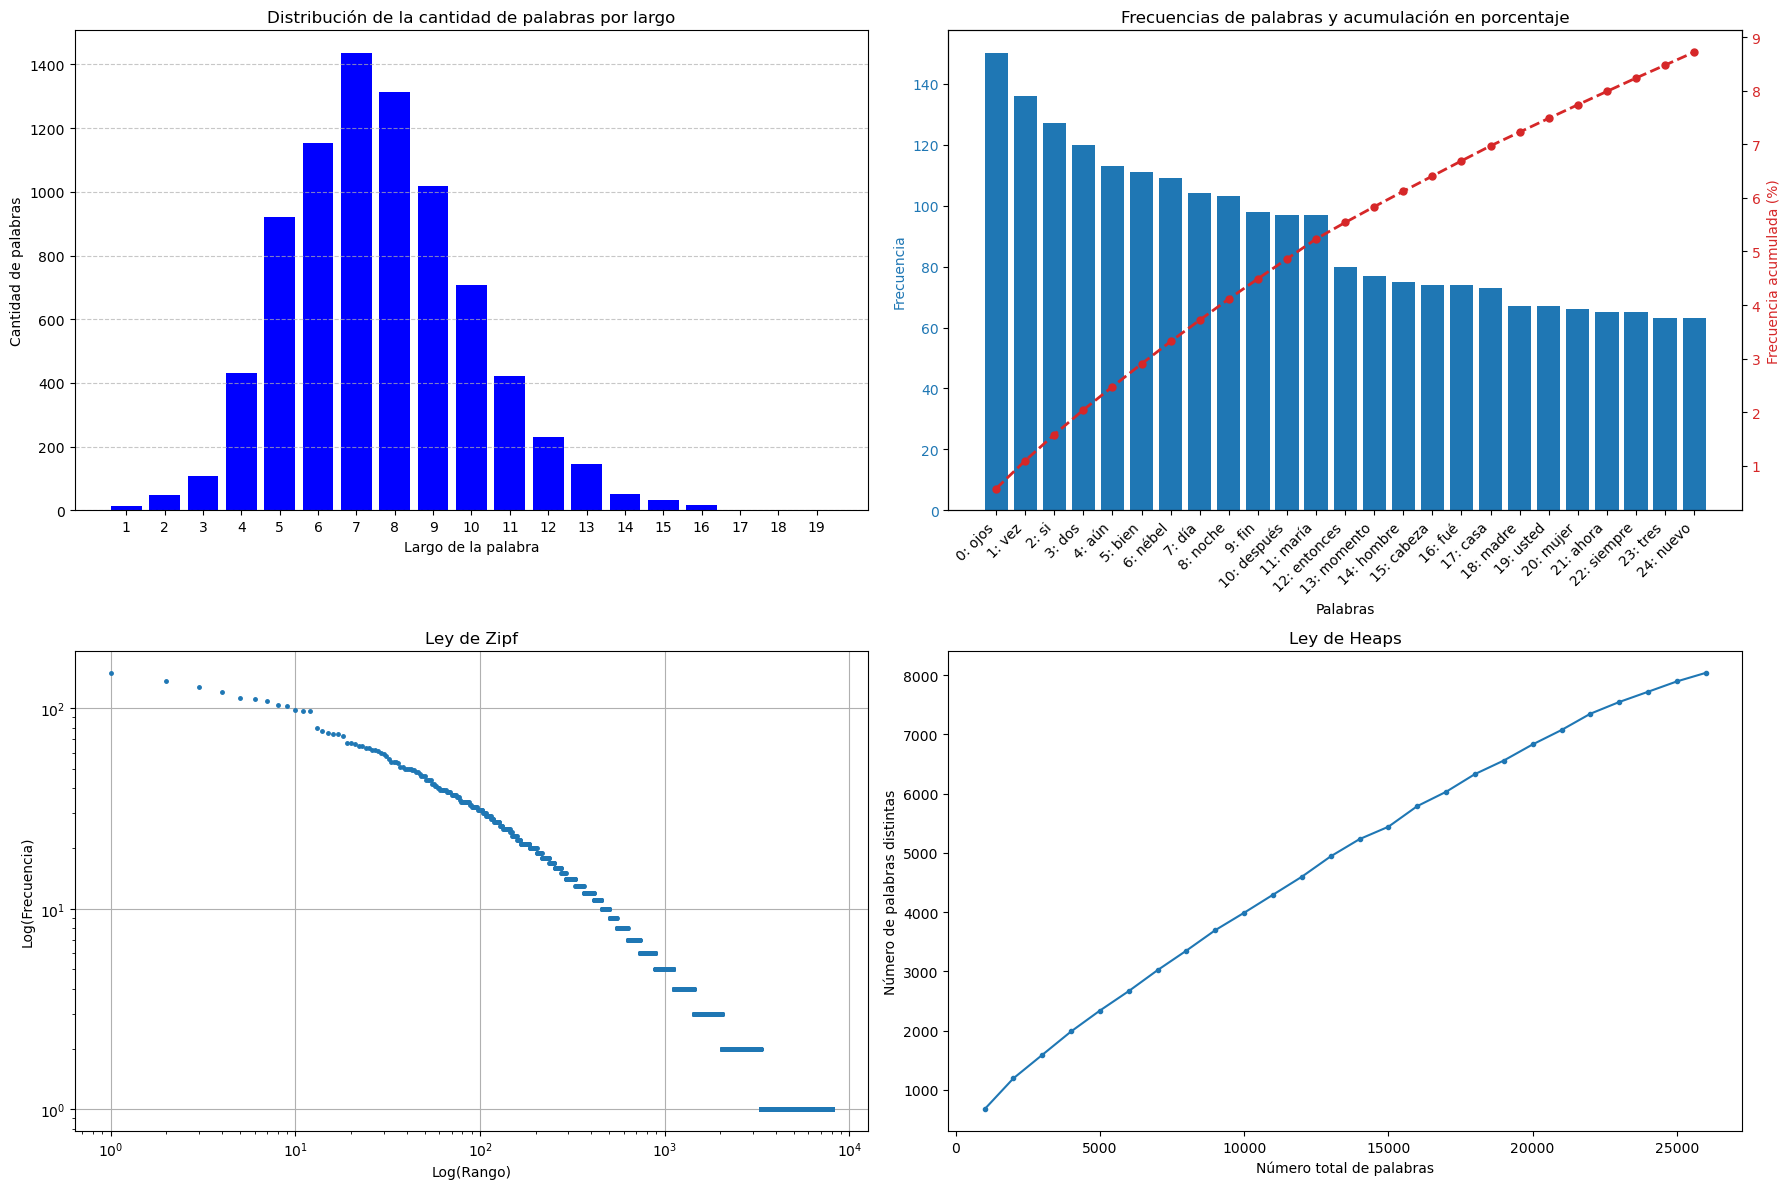

Ley de Pareto
Porcentaje de palabras distintas que son el 80% del total: 1.17%
Porcentaje de palabras distintas que son el 20% del total: 61.86%


In [97]:
# análisis del texto sin stop words de nltk en español
analizarTexto(text_content, palabras_excluir = set(nltk.corpus.stopwords.words('spanish')))

In [98]:
# No se cumple la ley de Pareto, muy pocas palabras acumulan el 80% del texto

# Observando la gráfica para ley de Zips:
# Del lado derecho derecho la gráfica se ve dispersa porque hay pocas palabras con frecuencia muy alta pero se ve linealidad.
# Del lado izquierdo se generan bandas porque hay palabras con baja frecuencia

# Observando la gráfica para la ley de Heaps:
# La curva se vuelve casi lineal

In [99]:
# navegando la url se ve que el inicio del texto es en LIBRO PRIMERO DE MOISÉS
text_content = get_text_from_url(
        url="https://github.com/jlopezmalla/Flights/raw/3fadaa3b6bf3279ce04971b1438e1099f9f7a726/BIBLIA%20COMPLETA.txt",
        start_marker="LIBRO PRIMERO DE MOISÉS",
        include_start_marker=True,
        encoding='ansi',
        verbose=True
)

Texto crudo
LA SANTA BIBLIA, ANTIGUO TESTAMENTO, VERSIÓN DE CASIODORO DE REINA (1569) REVISADA POR CIPRIANO DE VALERA (1602), OTRAS REVISIONES: 1862, 1909 Y 1960

Parte # 1 (INCLUYE LA LEY), los 10 primeros lib
...
amente vengo en breve. Amén; sí, ven, Señor Jesús. 21 La gracia de nuestro Señor Jesucristo sea con todos vosotros. Amén. 
------------------------------------------------------------------------


Texto recortado
LIBRO PRIMERO DE MOISÉS

GÉNESIS

La creación

Génesis 1

Génesis 1:1
          En el principio creó Dios los cielos y la tierra.

 Génesis 1:2
          Y la tierra estaba desordenada y v
...
iertamente vengo en breve. Amén; sí, ven, Señor Jesús. 21 La gracia de nuestro Señor Jesucristo sea con todos vosotros. Amén. 
------------------------------------------------------------------------


Frecuencias primeros 20: [('de', 45034), ('y', 43545), ('a', 20476), ('que', 19586), ('la', 19185), ('el', 18196), ('los', 17243), ('en', 15665), ('no', 8246), ('su', 7736), ('jehová', 6941), ('por', 6923), ('se', 6572), ('del', 6346), ('para', 5965), ('las', 5810), ('con', 5660), ('sus', 5177), ('al', 4520), ('dios', 4282)]
Frecuencias últimos 20: [('flautistas', 1), ('engañadas', 1), ('gocémonos', 1), ('teñida', 1), ('engañase', 1), ('decapitados', 1), ('engañaba', 1), ('inscrito', 1), ('cobardes', 1), ('fulgor', 1), ('preciosísima', 1), ('diáfana', 1), ('adornados', 1), ('crisopraso', 1), ('transparente', 1), ('brillen', 1), ('iluminará', 1), ('selles', 1), ('santifíquese', 1), ('añadiere', 1)]
Cantidad de palabras: 26208
Cantidad de palabras frecuencia <=3: 16913
Cantidad de palabras frecuencia =1: 10639


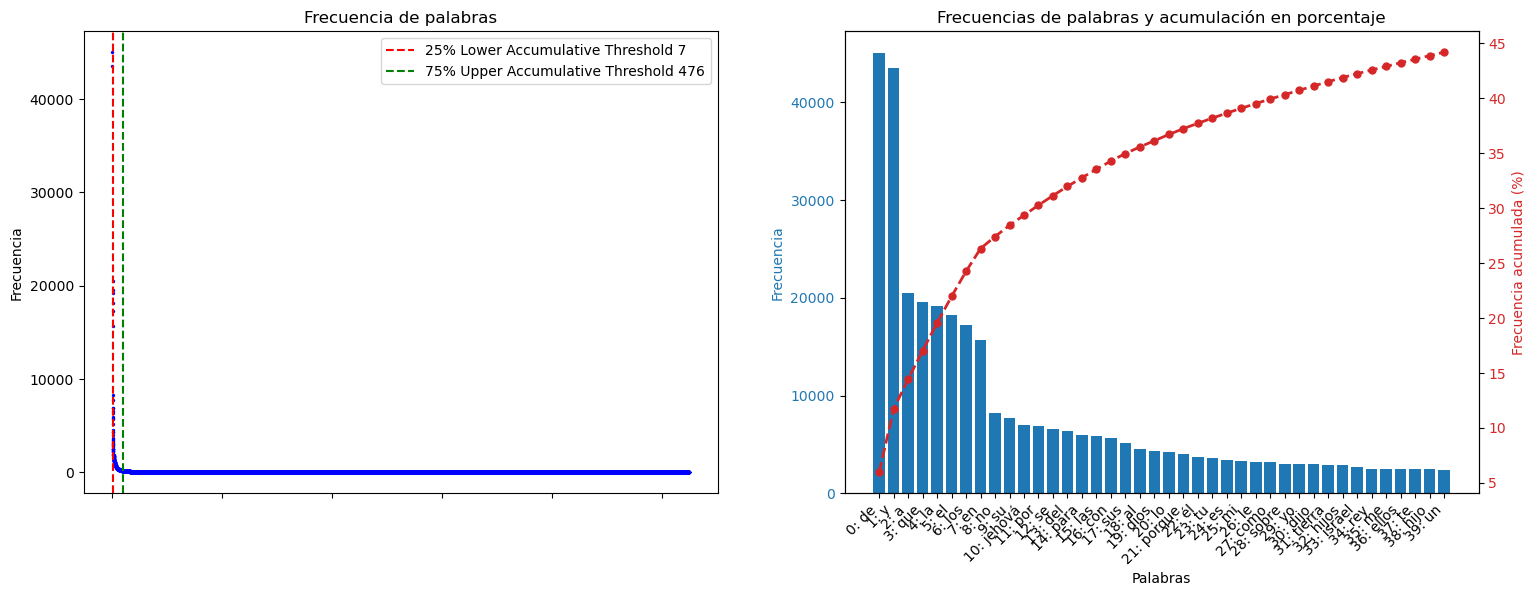

<Figure size 1000x600 with 0 Axes>

In [100]:

f1 = conteo_inicial(text_content,40)

In [101]:
# el corte para determinar stop words podría estar en la palabra 9

In [102]:
stop_words_empiricas = [w[0] for w in f1[:10]]
print(stop_words_empiricas)

['de', 'y', 'a', 'que', 'la', 'el', 'los', 'en', 'no', 'su']


In [103]:
# stop words en español de nltk
print(set(nltk.corpus.stopwords.words('spanish')))

{'mía', 'unos', 'estuviese', 'lo', 'esas', 'hayamos', 'tuvo', 'por', 'estuviera', 'tuya', 'el', 'nos', 'fuéramos', 'estuvieseis', 'teníais', 'estada', 'habido', 'estuvieran', 'estaban', 'mis', 'nosotras', 'somos', 'se', 'vuestra', 'seremos', 'estuvieron', 'estarías', 'yo', 'un', 'porque', 'hubiera', 'seamos', 'a', 'no', 'habíamos', 'habríais', 'sus', 'habían', 'habidas', 'estaríamos', 'ni', 'le', 'tuviste', 'quienes', 'ti', 'está', 'estuvierais', 'estamos', 'erais', 'sentidos', 'algo', 'ellas', 'estuviéramos', 'fuiste', 'nuestro', 'tendrá', 'seríamos', 'sí', 'tengo', 'fueses', 'estar', 'pero', 'este', 'fueseis', 'estén', 'mi', 'míos', 'habréis', 'estado', 'fui', 'hayas', 'seas', 'tendré', 'hemos', 'serían', 'soy', 'os', 'fuesen', 'hubieses', 'seríais', 'estuviste', 'suyos', 'nosotros', 'tanto', 'hayáis', 'todo', 'estaré', 'estemos', 'del', 'sea', 'seáis', 'hube', 'éramos', 'en', 'tuvieron', 'ya', 'eras', 'tenidas', 'su', 'esos', 'habremos', 'sois', 'estuvisteis', 'tuvisteis', 'sobre', 

In [104]:
# stops word empiricas que no están en nltk.corpus.stopwords.words('spanish')
print([w for w in stop_words_empiricas if w not in set(nltk.corpus.stopwords.words('spanish'))])

[]


In [105]:
# todas ls stop words empíricas están en las de nltk

In [106]:
# stops word de nltk.corpus.stopwords.words('spanish') que están el texto pero no en stop words empíricas
words = [wf[0] for wf in f1]
print([w for w in set(nltk.corpus.stopwords.words('spanish')) if w in words and w not in stop_words_empiricas])

['mía', 'unos', 'estuviese', 'lo', 'esas', 'hayamos', 'tuvo', 'por', 'estuviera', 'tuya', 'nos', 'fuéramos', 'estuvieseis', 'teníais', 'habido', 'estaban', 'mis', 'nosotras', 'somos', 'se', 'vuestra', 'seremos', 'estuvieron', 'estarías', 'yo', 'un', 'porque', 'hubiera', 'seamos', 'habíamos', 'habríais', 'sus', 'habían', 'ni', 'le', 'tuviste', 'quienes', 'ti', 'está', 'estuvierais', 'estamos', 'erais', 'sentidos', 'algo', 'ellas', 'estuviéramos', 'fuiste', 'nuestro', 'tendrá', 'seríamos', 'sí', 'tengo', 'fueses', 'estar', 'pero', 'este', 'fueseis', 'estén', 'mi', 'míos', 'habréis', 'estado', 'fui', 'hayas', 'seas', 'tendré', 'hemos', 'serían', 'soy', 'os', 'fuesen', 'hubieses', 'estuviste', 'suyos', 'nosotros', 'tanto', 'hayáis', 'todo', 'estaré', 'estemos', 'del', 'sea', 'seáis', 'hube', 'éramos', 'tuvieron', 'ya', 'eras', 'tenidas', 'esos', 'habremos', 'sois', 'estuvisteis', 'tuvisteis', 'sobre', 'qué', 'siente', 'contra', 'tuvimos', 'tuyo', 'habéis', 'tuviese', 'estéis', 'estaba', 'm

In [107]:
# conteo de palabras quitando stop words empiricas
f3 = calculate_frequency(text_content, palabras_excluir = stop_words_empiricas)
print(f3)

[('jehová', 6941), ('por', 6923), ('se', 6572), ('del', 6346), ('para', 5965), ('las', 5810), ('con', 5660), ('sus', 5177), ('al', 4520), ('dios', 4282), ('lo', 4274), ('porque', 4014), ('él', 3667), ('tu', 3579), ('es', 3446), ('mi', 3303), ('le', 3240), ('como', 3177), ('sobre', 3004), ('yo', 3003), ('dijo', 2954), ('tierra', 2938), ('hijos', 2857), ('israel', 2658), ('rey', 2515), ('me', 2506), ('ellos', 2470), ('te', 2445), ('hijo', 2445), ('un', 2352), ('todo', 2288), ('todos', 2260), ('he', 2259), ('ha', 2138), ('casa', 1969), ('cuando', 1892), ('ni', 1886), ('entonces', 1878), ('pueblo', 1817), ('si', 1770), ('1', 1752), ('vosotros', 1748), ('pero', 1701), ('pues', 1694), ('contra', 1682), ('os', 1673), ('así', 1667), ('también', 1645), ('delante', 1593), ('había', 1582), ('tus', 1578), ('2', 1565), ('día', 1465), ('señor', 1462), ('hasta', 1422), ('mas', 1418), ('será', 1413), ('una', 1408), ('les', 1395), ('aquí', 1386), ('mí', 1344), ('tú', 1338), ('3', 1333), ('5', 1326), ('

In [108]:
# conteo de palabras quitando stop words de nltk
f3 = calculate_frequency(text_content, palabras_excluir = set(nltk.corpus.stopwords.words('spanish')))
print(f3)

[('jehová', 6941), ('dios', 4282), ('dijo', 2954), ('tierra', 2938), ('hijos', 2857), ('israel', 2658), ('rey', 2515), ('hijo', 2445), ('casa', 1969), ('entonces', 1878), ('pueblo', 1817), ('si', 1770), ('1', 1752), ('pues', 1694), ('así', 1667), ('delante', 1593), ('2', 1565), ('día', 1465), ('señor', 1462), ('mas', 1418), ('aquí', 1386), ('3', 1333), ('5', 1326), ('4', 1315), ('6', 1307), ('9', 1294), ('8', 1287), ('7', 1270), ('hombre', 1260), ('diciendo', 1251), ('10', 1218), ('11', 1214), ('12', 1210), ('david', 1204), ('13', 1177), ('mano', 1167), ('toda', 1155), ('14', 1140), ('padre', 1094), ('todas', 1089), ('15', 1075), ('16', 1039), ('jesús', 1029), ('17', 1011), ('hombres', 987), ('18', 985), ('días', 951), ('19', 922), ('hizo', 914), ('20', 909), ('judá', 888), ('sino', 882), ('moisés', 880), ('corazón', 874), ('21', 871), ('jerusalén', 867), ('ahora', 864), ('nombre', 863), ('ciudad', 843), ('vino', 829), ('22', 824), ('dos', 788), ('lugar', 783), ('dicho', 782), ('cosas'

In [109]:
# conteo de frecuencias de palabras específicas
f2 = calculate_frequency(text_content, palabras_incluir = ['de', 'la', 'que', 'el', 'en', 'y', 'a', 'los', 'se', 'del'])
print(f2)

[('de', 45034), ('y', 43545), ('a', 20476), ('que', 19586), ('la', 19185), ('el', 18196), ('los', 17243), ('en', 15665), ('se', 6572), ('del', 6346)]


Cantidad de palabras: 755694
Cantidad de palabras únicas: 26208
Cantidad de palabras raras: 16913


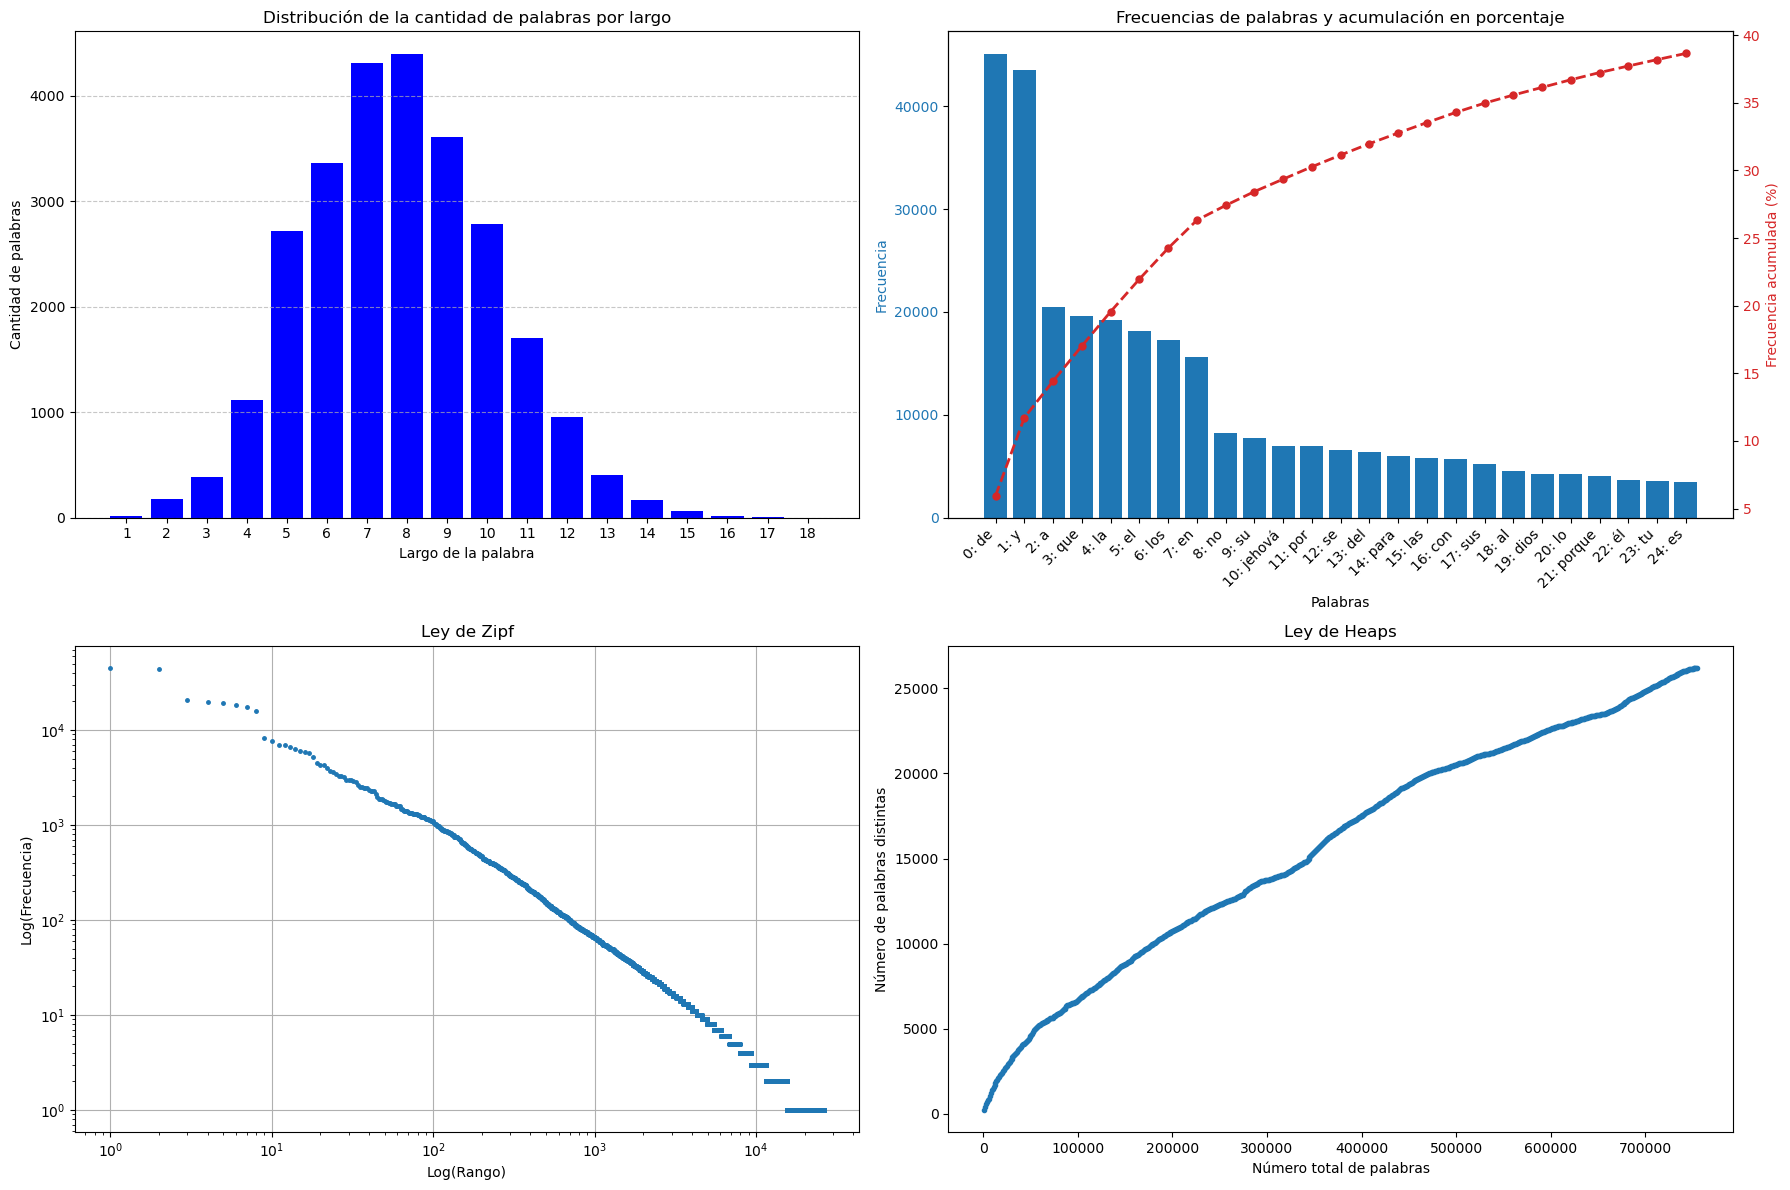

Ley de Pareto
Porcentaje de palabras distintas que son el 80% del total: 0.02%
Porcentaje de palabras distintas que son el 20% del total: 96.92%


In [110]:
# análisis del texto completo
analizarTexto(text_content)

In [111]:
# No se cumple la ley de Pareto, muy pocas palabras acumulan el 80% del texto

# Observando la gráfica para ley de Zips:
# Se ve cierta linealidad con dispersión a la izquierda y derecha

# Observando la gráfica para la ley de Heaps:
# La curva se vuelve casi lineal

Cantidad de palabras 755694
Cantidad de palabras únicas: 26208
A excluir 313 de las cuales 289 están en el texto
Luego de de filtrar:
Cantidad de palabras: 371013
Cantidad de palabras únicas: 25919
Cantidad de palabras raras: 16877


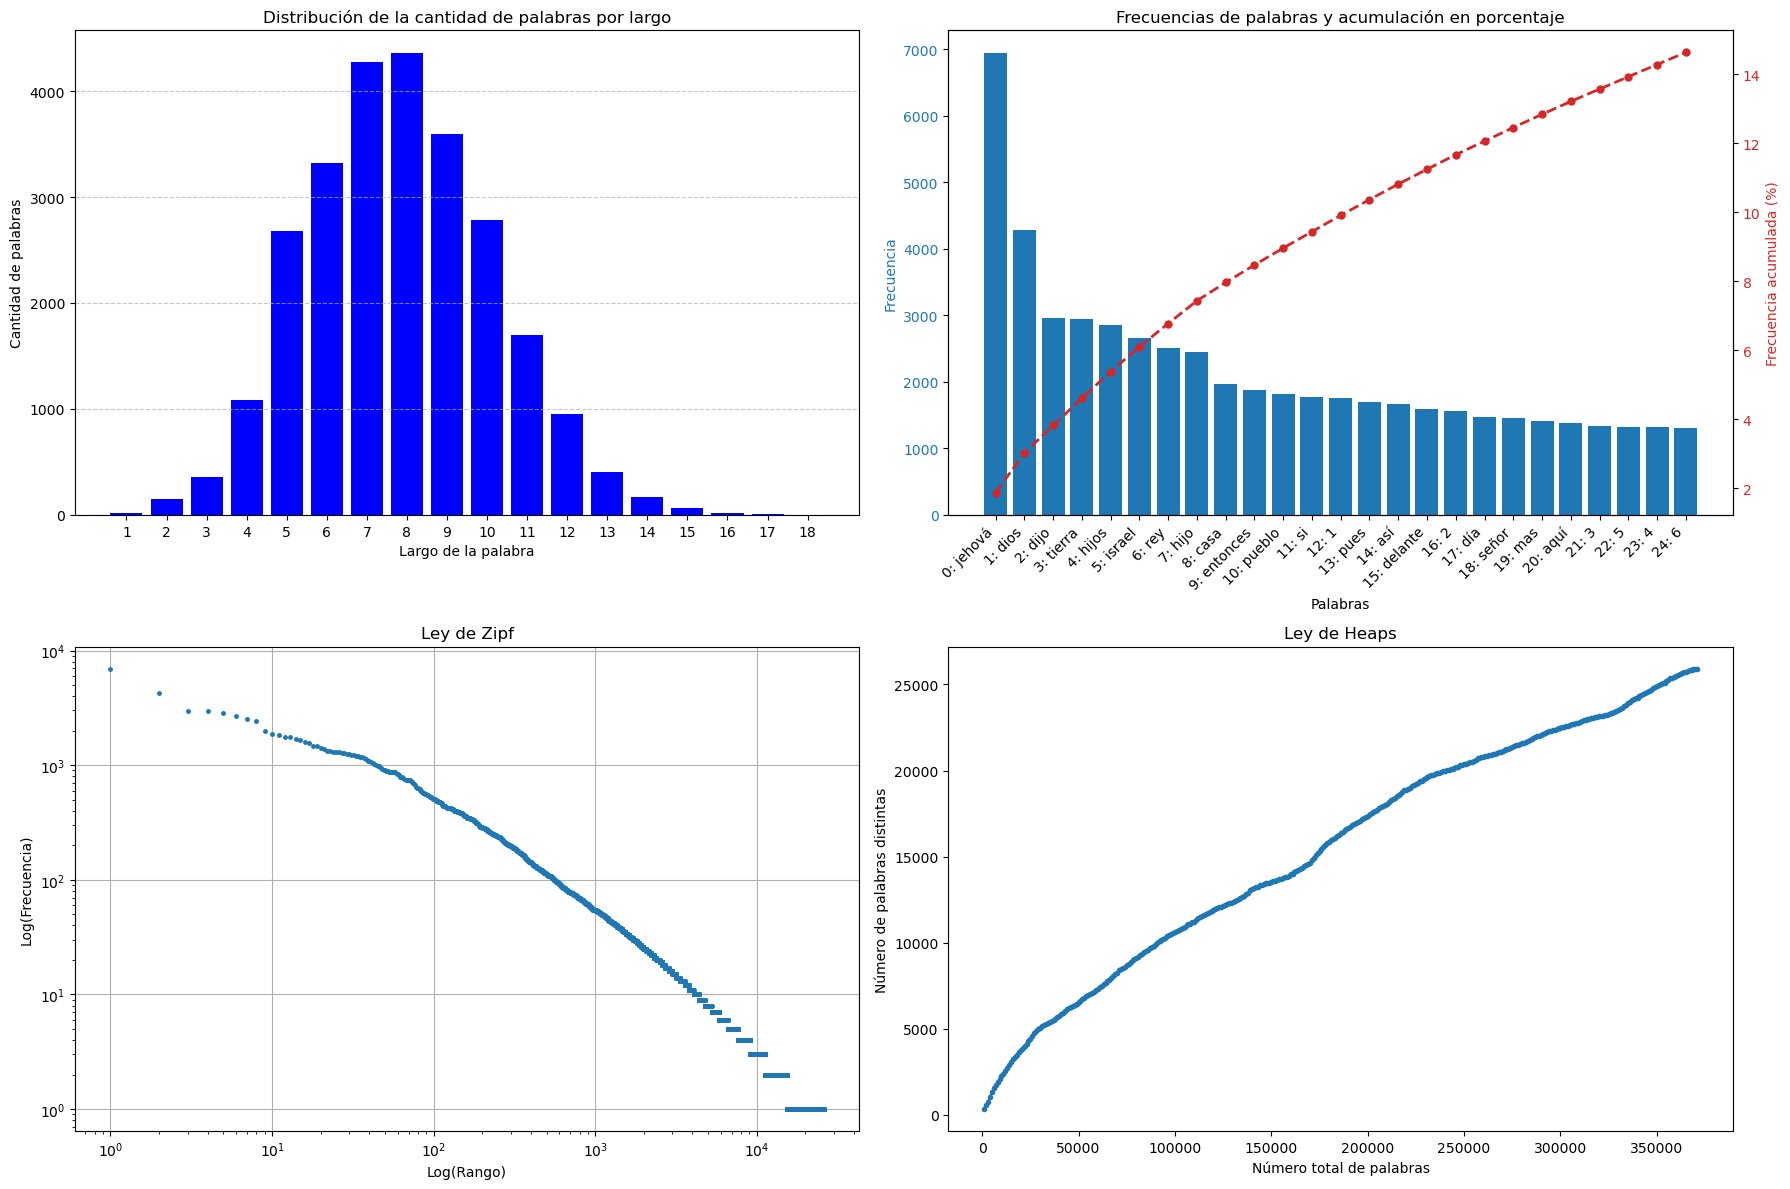

Ley de Pareto
Porcentaje de palabras distintas que son el 80% del total: 0.16%
Porcentaje de palabras distintas que son el 20% del total: 89.66%


In [112]:
# análisis del texto sin stop words de nltk en español
analizarTexto(text_content, palabras_excluir = set(nltk.corpus.stopwords.words('spanish')))

In [113]:
# No se cumple la ley de Pareto, muy pocas palabras acumulan el 80% del texto

# Observando la gráfica para ley de Zips:
# Del lado derecho derecho la gráfica se ve dispersa porque hay pocas palabras con frecuencia muy alta pero se ve linealidad.
# Del lado izquierdo se generan bandas porque hay palabras con baja frecuencia

# Observando la gráfica para la ley de Heaps:
# La curva se vuelve casi lineal con algunos baches

Cantidad de palabras 755694
Cantidad de palabras únicas: 26208
A excluir 315 de las cuales 291 están en el texto
Luego de de filtrar:
Cantidad de palabras: 359790
Cantidad de palabras únicas: 25917
Cantidad de palabras raras: 16877


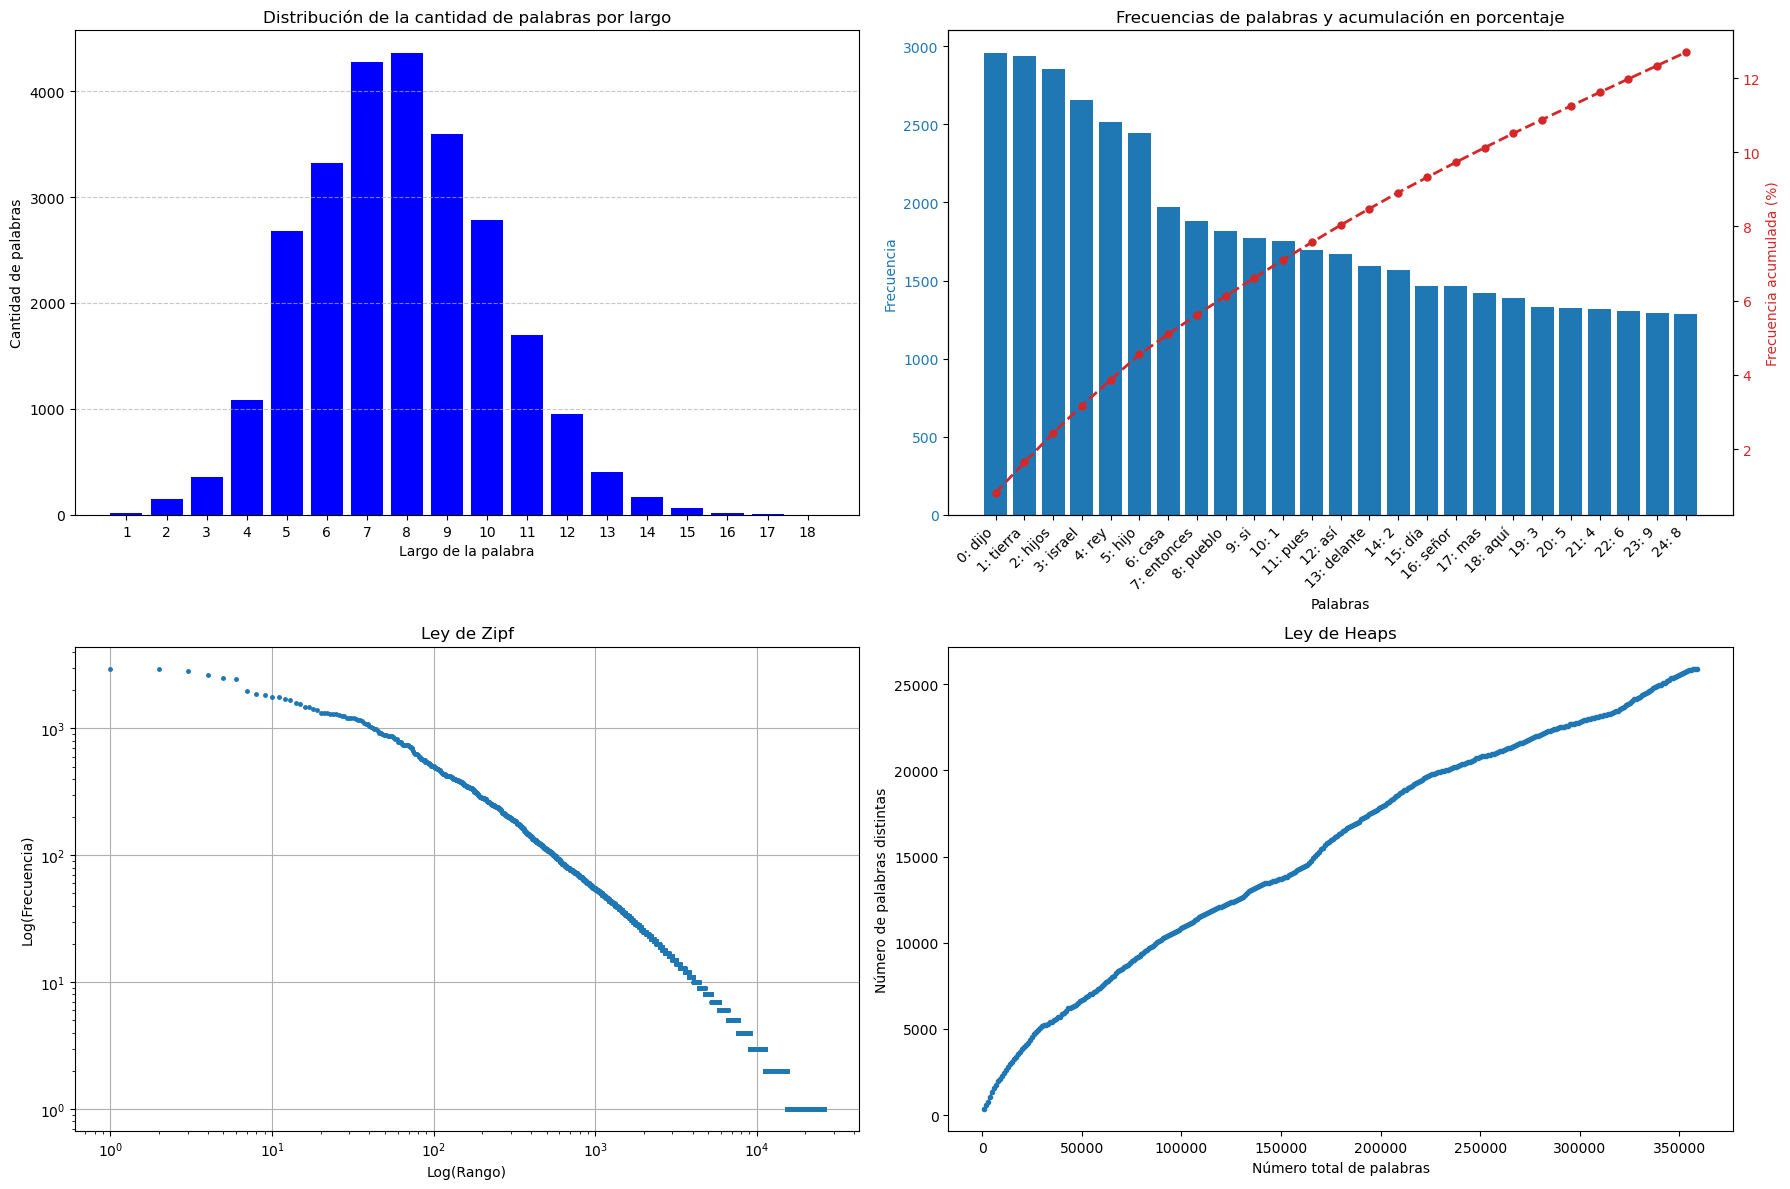

Ley de Pareto
Porcentaje de palabras distintas que son el 80% del total: 0.19%
Porcentaje de palabras distintas que son el 20% del total: 89.16%


In [114]:
# análisis del texto sin stop words de nltk en español + ['jehová','dios'] 
analizarTexto(text_content, palabras_excluir = set(nltk.corpus.stopwords.words('spanish')+ ['jehová','dios']))

In [115]:
# No se cumple la ley de Pareto, muy pocas palabras acumulan el 80% del texto

# Observando la gráfica para ley de Zips:
# Del lado derecho derecho la gráfica se ve dispersa porque hay pocas palabras con frecuencia muy alta pero se ve linealidad.
# Del lado izquierdo se generan bandas porque hay palabras con baja frecuencia

# Observando la gráfica para la ley de Heaps:
# La curva se vuelve casi lineal con algunos baches